In [1]:
%autosave 100

import numpy as np
import math
import matplotlib.pyplot as plt

Autosaving every 100 seconds


In [2]:
def x0(z):
    return 0 if z == 0 else 1

def t0(z):
    return T_m if z == 0 else T_0

def W_(X, T):
    return [-K * X[i]**alpha * math.exp(-E / (R * T[i])) for i in range(len(X))]

In [3]:
def solve(X_old, T_old):
    # predictor X
    alpha_ = np.zeros([len(X_old)], dtype = float)
    beta_  = np.zeros([len(X_old)], dtype = float)
    
    a_ = D / dz**2
    b_ = -2*D / dz**2 - 1. / dt
    c_ = D / dz**2
    d_  = np.zeros([len(X_old)], dtype = float)
    for i in range(len(X_old)):
        d_[i] = K * X_old[i]**alpha * math.exp(-E/(R*T_old[i])) - X_old[i] / dt
    
    alpha_[0] = -c_ / b_
    beta_[0] = d_[0] / b_
    for i in range(1, len(alpha_)):
        alpha_[i] = -c_ / (a_ * alpha_[i - 1] + b_)
        beta_[i] = (d_[i] - a_ * beta_[i - 1]) / (a_ * alpha_[i - 1] + b_)
    
    X_pred = np.zeros([len(X_old)], dtype = float)
    X_pred[-1] = (d_[-1] - a_ * beta_[-2]) / (a_ * alpha_[-2] + b_ + c_)
    for i in range(len(X_pred) - 1, 0, -1):
        X_pred[i-1] = alpha_[i-1] * X_pred[i] + beta_[i-1]     
        
    # predictor T
    alpha_ = np.zeros([len(X_old)], dtype = float)
    beta_  = np.zeros([len(X_old)], dtype = float)
    
    a_ = lambd / (po * C * dz**2)
    b_ = -2*lambd / (po * C * dz**2) - 1. / dt
    c_ = lambd / (po * C * dz**2)
    d_  = np.zeros([len(X_old)], dtype = float)
    for i in range(len(X_old)):
        d_[i] = -Q / C * K * X_old[i]**alpha * math.exp(-E/(R*T_old[i])) - T_old[i] / dt 
    d_[0] -= a_ * T_m
    
    
    alpha_[0] = -c_ / b_
    beta_[0] = d_[0] / b_
    for i in range(1, len(alpha_)):
        alpha_[i] = -c_ / (a_ * alpha_[i - 1] + b_)
        beta_[i] = (d_[i] - a_ * beta_[i - 1]) / (a_ * alpha_[i - 1] + b_)
    
    T_pred = np.zeros([len(X_old)], dtype = float)
    T_pred[-1] = (d_[-1] - a_ * beta_[-2]) / (a_ * alpha_[-2] + b_ + c_)
    for i in range(len(T_pred) - 1, 0, -1):
        T_pred[i-1] = alpha_[i-1] * T_pred[i] + beta_[i-1] 
    #T_pred[0] = (d_[0] - c_ * T_pred[1]) / (a_ + b_)
        
    # corrector X
    alpha_ = np.zeros([len(X_old)], dtype = float)
    beta_  = np.zeros([len(X_old)], dtype = float)
    
    a_ = D / dz**2
    b_ = -2*D / dz**2 - 1. / dt
    c_ = D / dz**2
    d_  = np.zeros([len(X_old)], dtype = float)
    for i in range(len(X_old)):
        d_[i] = K * X_pred[i]**alpha * math.exp(-E/(R*T_pred[i])) - X_pred[i] / dt
    
    alpha_[0] = -c_ / b_
    beta_[0] = d_[0] / b_
    for i in range(1, len(alpha_)):
        alpha_[i] = -c_ / (a_ * alpha_[i - 1] + b_)
        beta_[i] = (d_[i] - a_ * beta_[i - 1]) / (a_ * alpha_[i - 1] + b_)
    
    X_corr = np.zeros([len(X_old)], dtype = float)
    X_corr[-1] = (d_[-1] - a_ * beta_[-2]) / (a_ * alpha_[-2] + b_ + c_)
    for i in range(len(X_corr) - 1, 0, -1):
        X_corr[i-1] = alpha_[i-1] * X_corr[i] + beta_[i-1] 
    
    # corrector T
    alpha_ = np.zeros([len(X_old)], dtype = float)
    beta_  = np.zeros([len(X_old)], dtype = float)
    
    a_ = lambd / (po * C * dz**2)
    b_ = -2*lambd / (po * C * dz**2) - 1. / dt
    c_ = lambd / (po * C * dz**2)
    d_  = np.zeros([len(X_old)], dtype = float)
    for i in range(len(X_old)):
        d_[i] = -Q / C * K * X_pred[i]**alpha * math.exp(-E/(R*T_pred[i])) - T_pred[i] / dt 
    d_[0] -= a_ * T_m
    
    alpha_[0] = -c_ / b_
    beta_[0] = d_[0] / b_
    for i in range(1, len(alpha_)):
        alpha_[i] = -c_ / (a_ * alpha_[i - 1] + b_)
        beta_[i] = (d_[i] - a_ * beta_[i - 1]) / (a_ * alpha_[i - 1] + b_)
    
    T_corr = np.zeros([len(X_old)], dtype = float)
    T_corr[-1] = (d_[-1] - a_ * beta_[-2]) / (a_ * alpha_[-2] + b_ + c_)
    for i in range(len(T_corr) - 1, 0, -1):
        T_corr[i-1] = alpha_[i-1] * T_corr[i] + beta_[i-1] 
    #T_corr[0] = (d_[0] - c_ * T_corr[1]) / (a_ + b_)
    
    return (X_corr, T_corr)

In [12]:
# регулярный режим

T_0 = 293         # K
Q = 7.9 * 10**5     # Дж/кг 
C = 1980          # Дж/кг*К 
T_m = T_0 + Q / C # K
K = 1.6 * 10**6   # 1/с
E = 8 * 10**4     # Дж/моль
R = 8.314         # Дж/моль*К
alpha = 1         # 
po = 830           # кг/м^3
lambd = 0.13      # Дж/м*с*К
D = lambd / (po * C)# 8 * 10**(-12) # м^2/с

beta = R * T_m / E
gamma = R * T_m**2 / (E * (T_m - T_0))

U = ( 2*K*lambd / (Q*po*(T_m - T_0)) * (R*T_m**2/E)**2 * math.exp(-E/(R*T_m)) * T_0 / T_m ) ** 0.5
dd = D / U
dh = lambd / (po * C * U)
dr = dh * beta

dz = dr / 4
L  = 10 * dh
steps = round(L / dz) + 1

dt = dz / U
times = 100 #math.floor(L / U / dt)

print('D =',"%.2e" % D, 'м^2/с')
print('K =',"%.2e" % K, '1/с')
print('E =',E, 'Дж/моль')
print('U =',"%.6f" % U, 'м/с')
print('dd =',"%.6f" % dd, 'м')
print('dh =',"%.6f" % dh, 'м')
print('dr =',"%.6f" % dr, 'м')
print('dz =',"%.6f" % dz, 'м')
print('L =',"%.3f" % L, 'м')
print('steps =',steps)
print('dt =',"%.2f" % dt, 'с')
print('times =',times)

D = 7.91e-08 м^2/с
K = 1.60e+06 1/с
E = 80000 Дж/моль
U = 0.000039 м/с
dd = 0.002026 м
dh = 0.002026 м
dr = 0.000146 м
dz = 0.000036 м
L = 0.020 м
steps = 557
dt = 0.93 с
times = 100


(557,) (100, 557)
0


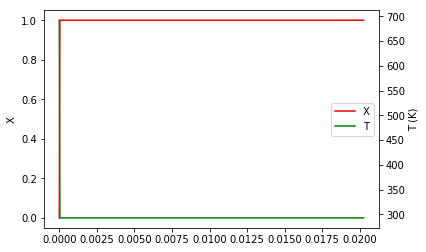

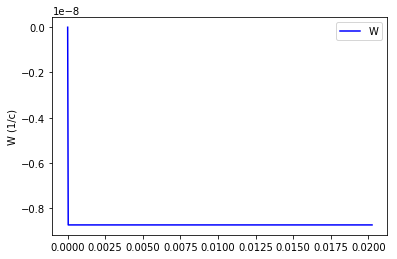

1


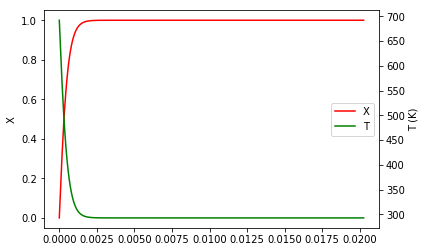

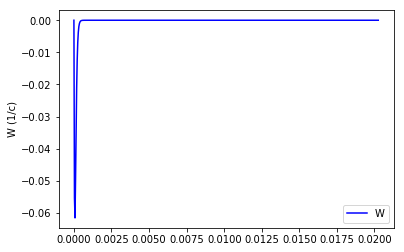

2


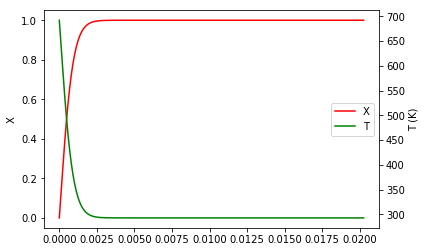

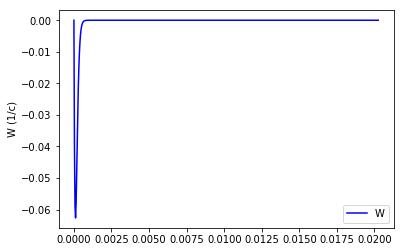

3


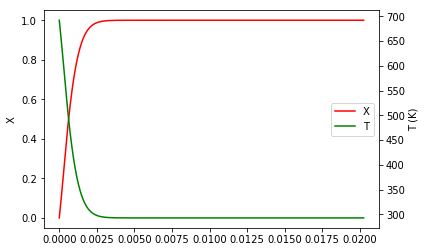

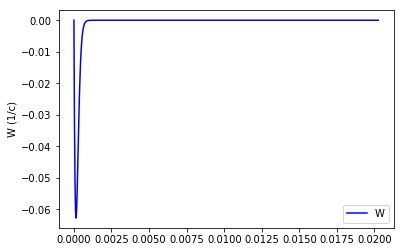

4


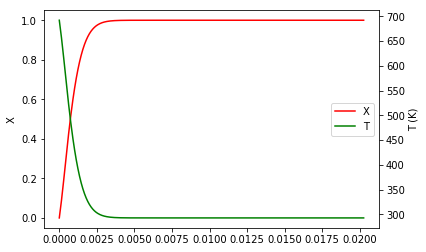

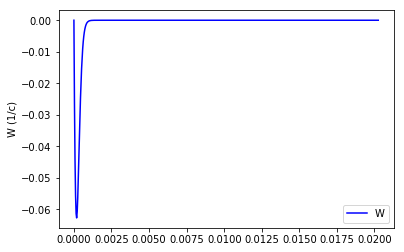

5


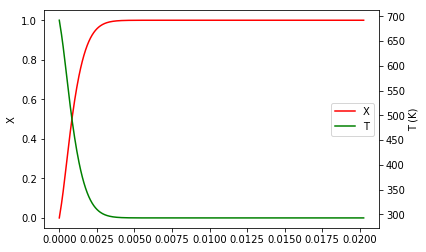

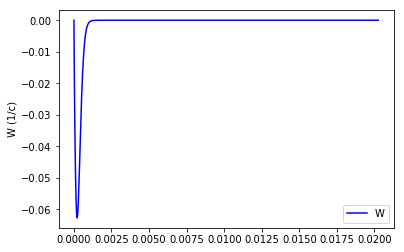

6


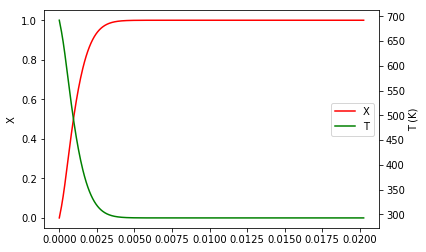

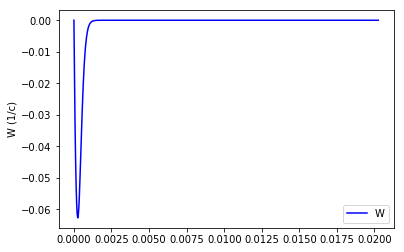

7


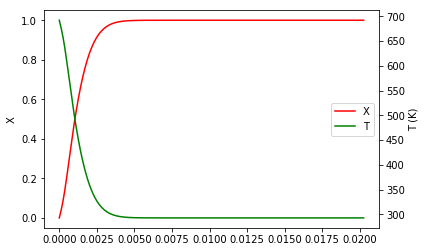

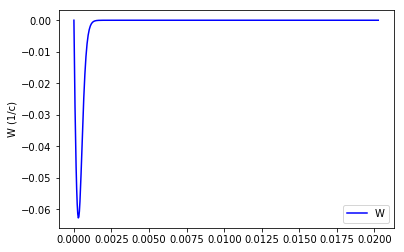

8


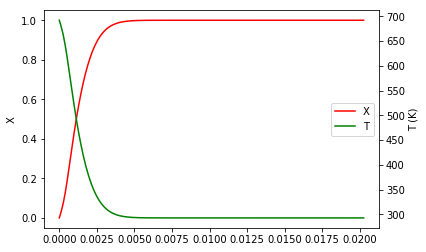

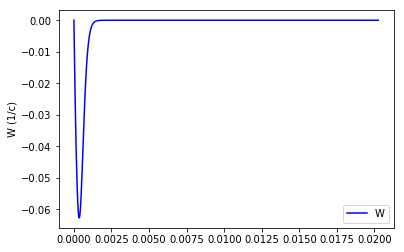

9


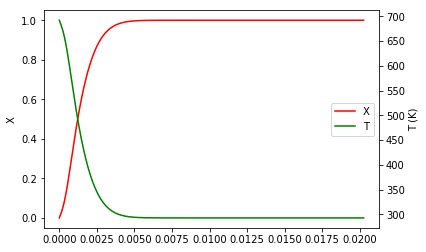

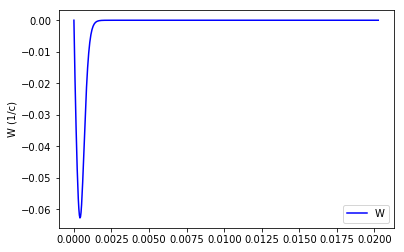

10


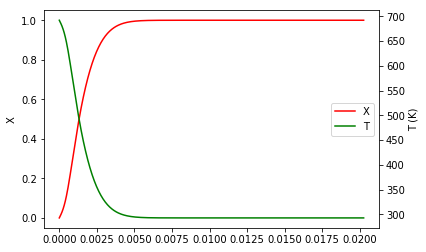

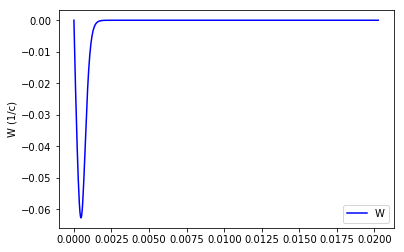

11


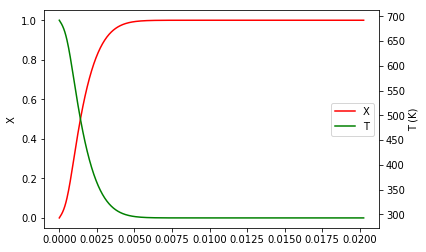

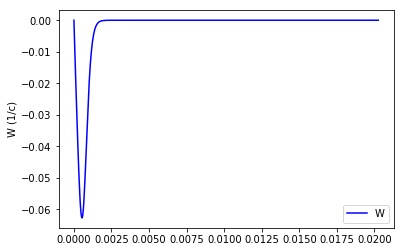

12


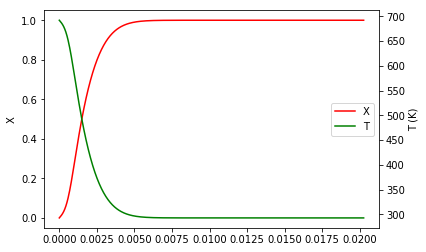

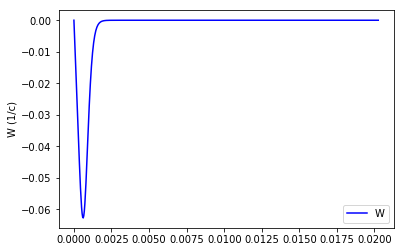

13


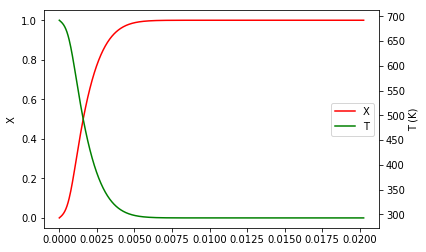

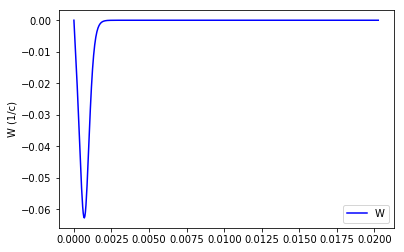

14


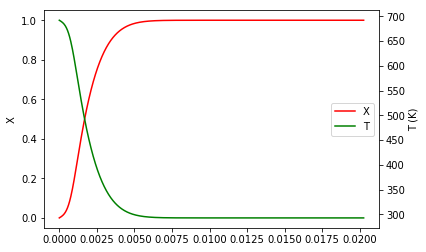

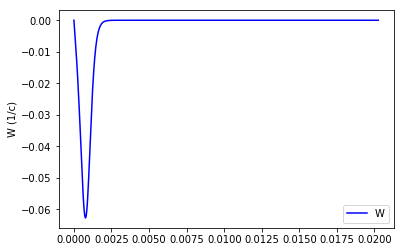

15


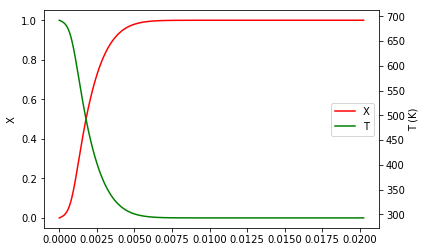

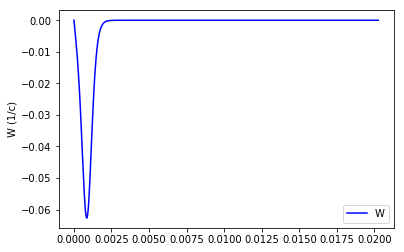

16


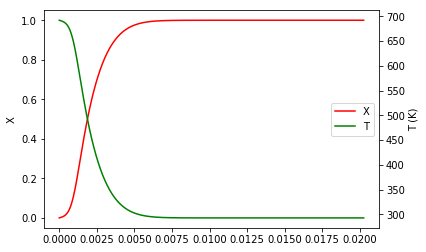

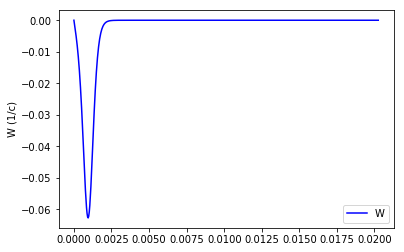

17


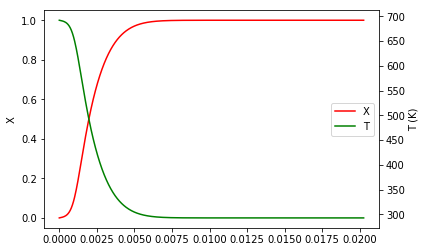

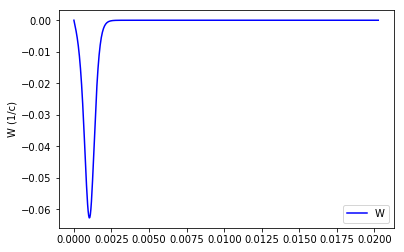

18


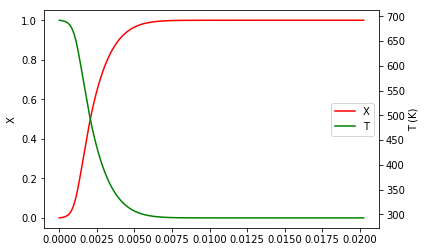

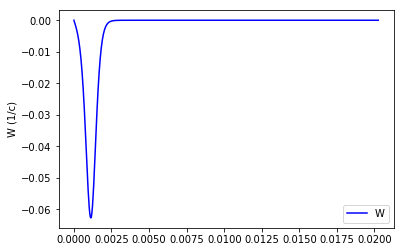

19


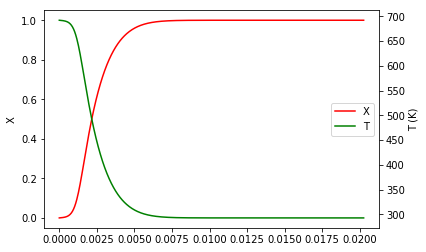

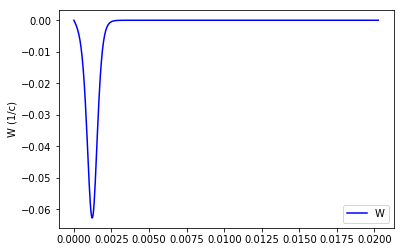

20


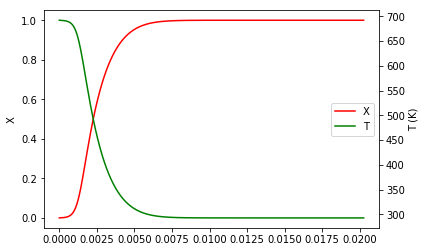

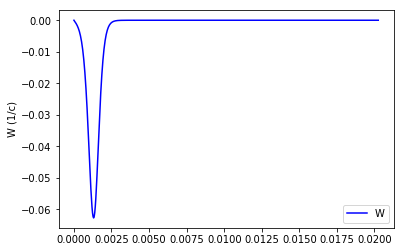

21


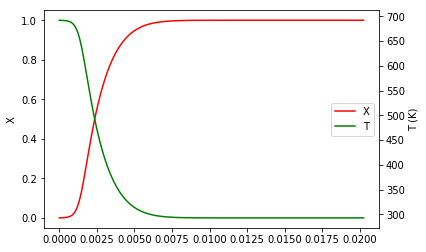

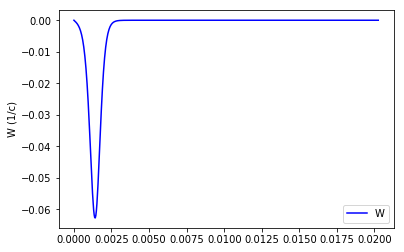

22


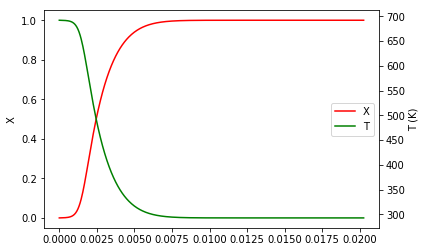

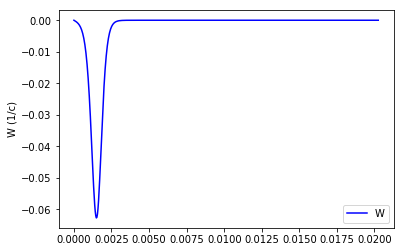

23


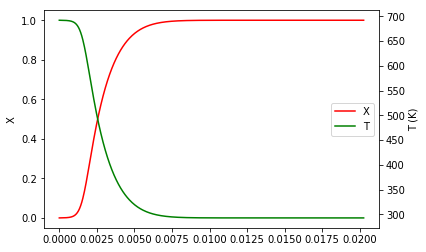

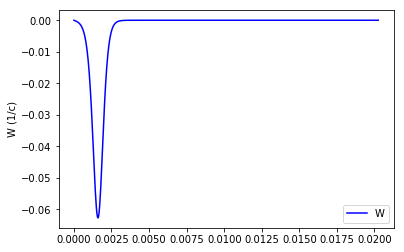

24


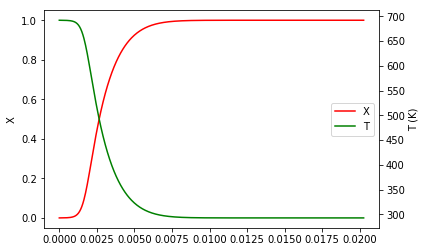

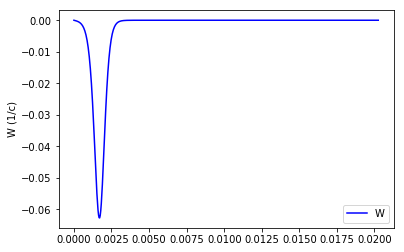

25


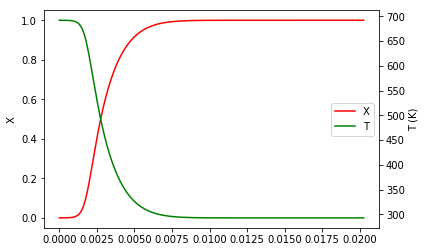

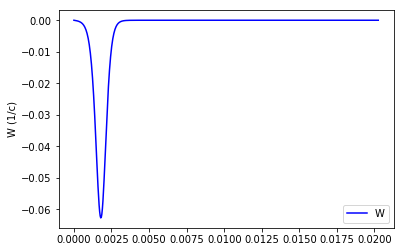

26


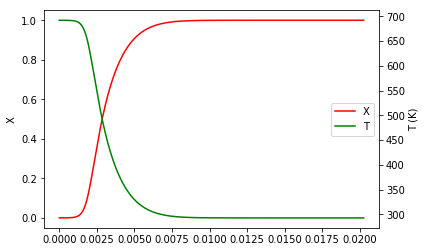

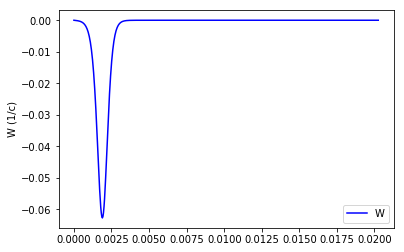

27


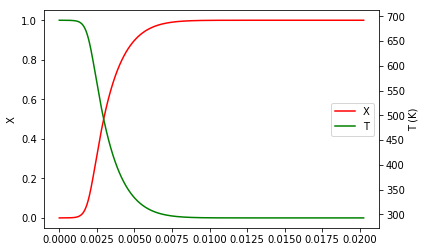

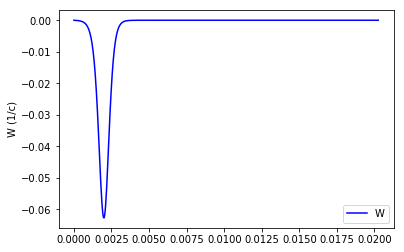

28


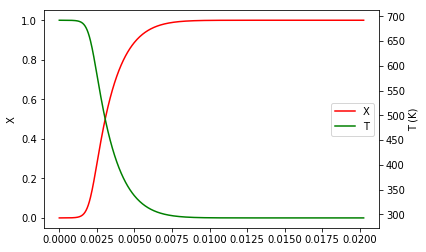

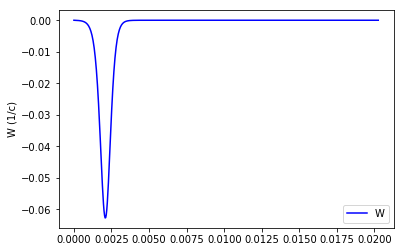

29


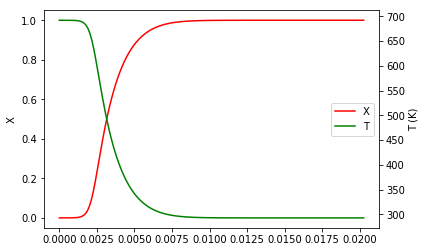

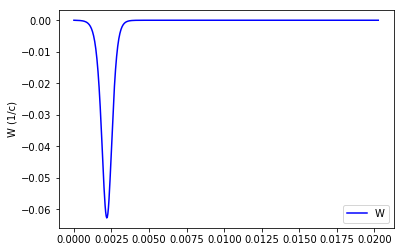

30


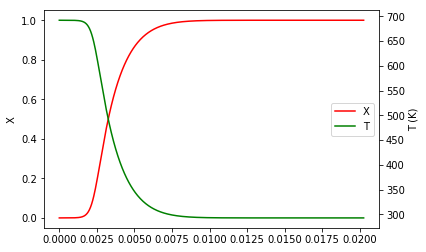

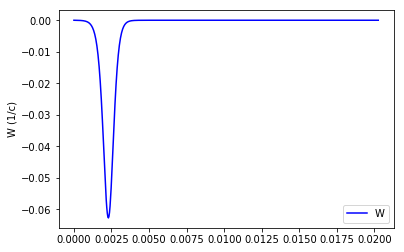

31


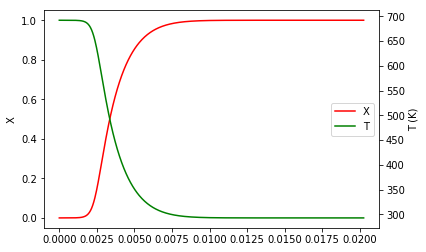

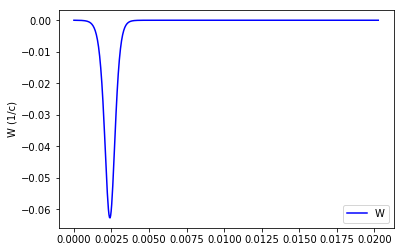

32


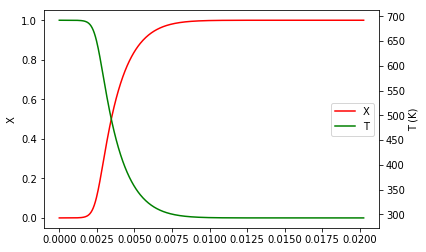

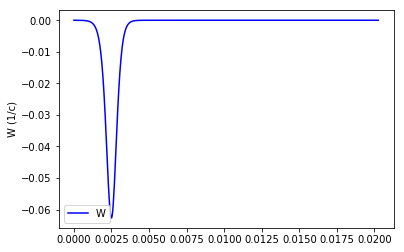

33


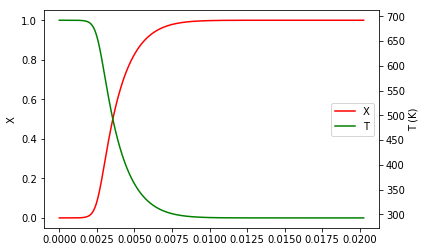

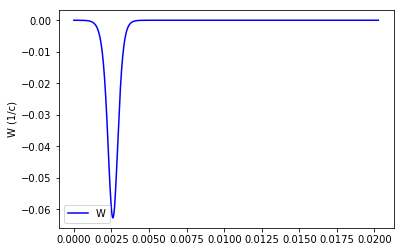

34


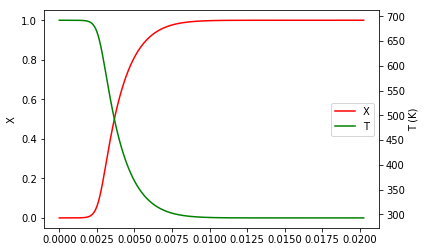

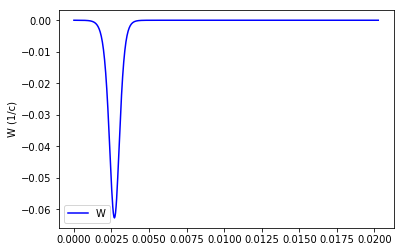

35


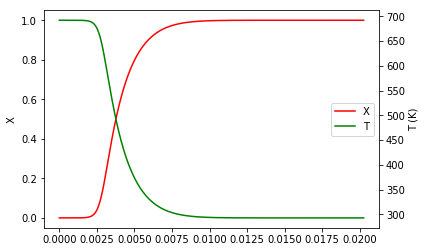

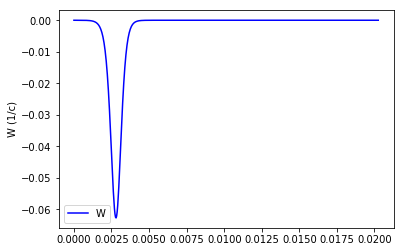

36


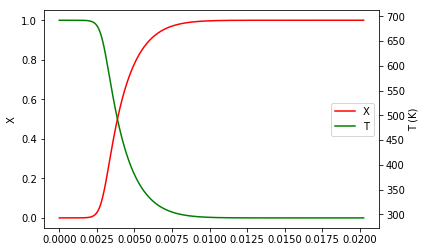

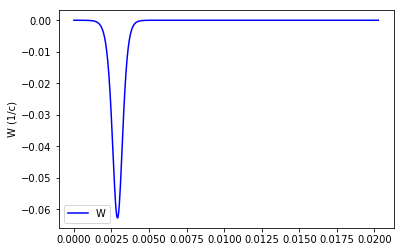

37


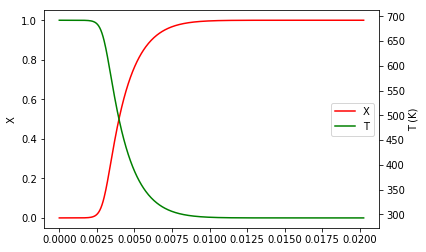

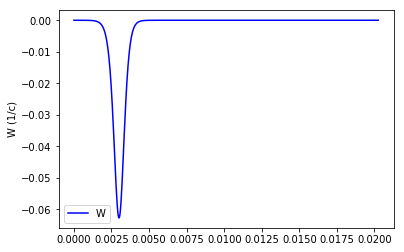

38


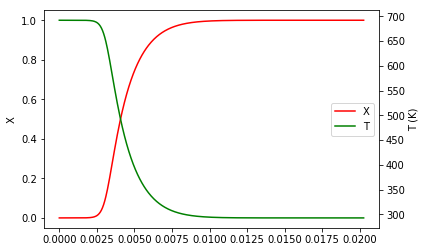

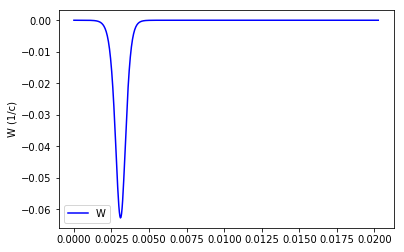

39


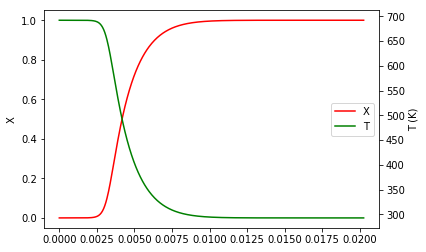

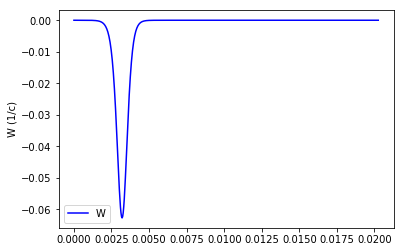

40


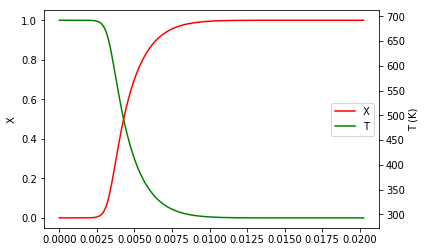

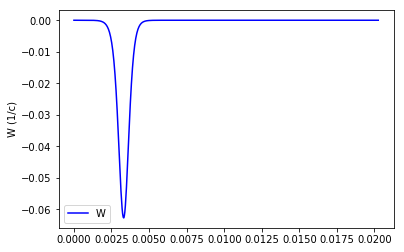

41


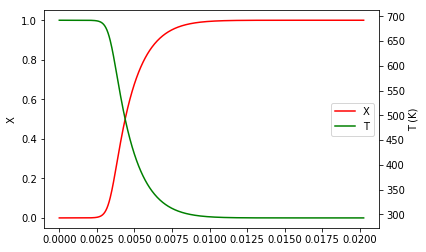

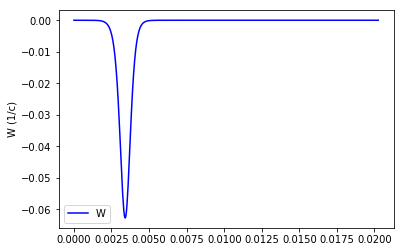

42


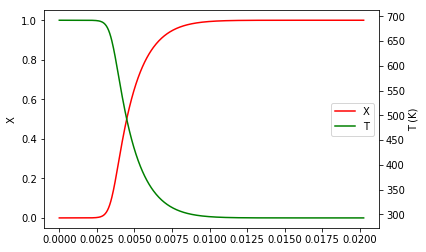

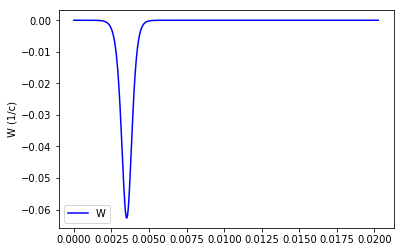

43


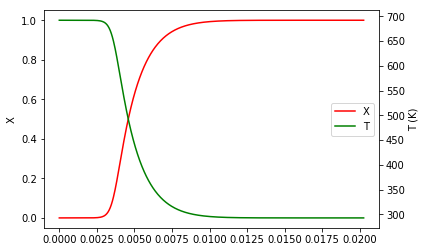

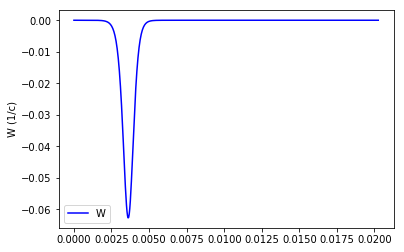

44


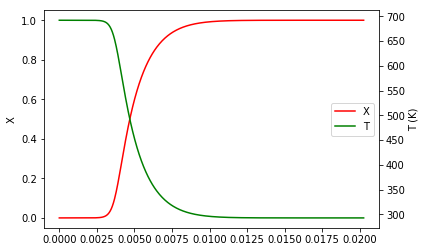

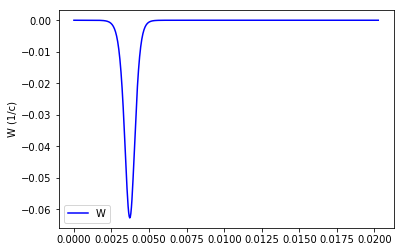

45


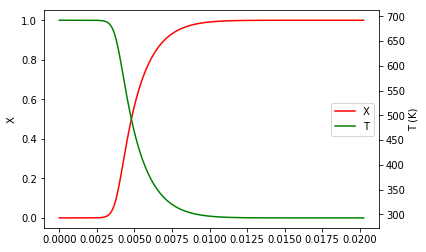

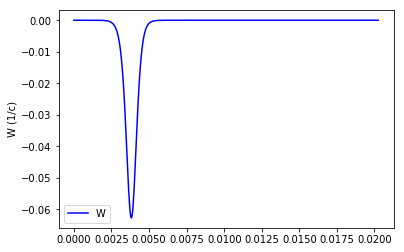

46


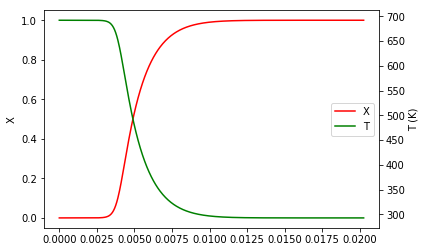

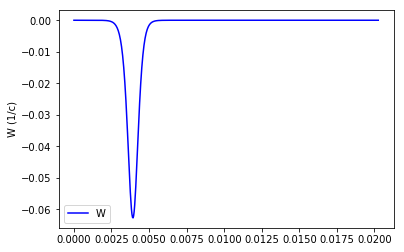

47


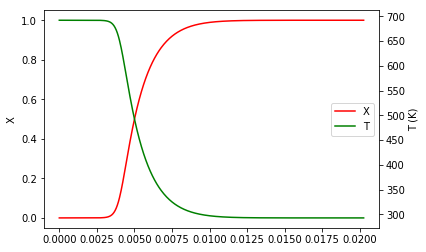

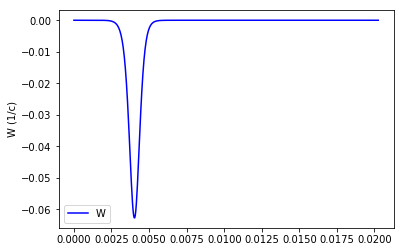

48


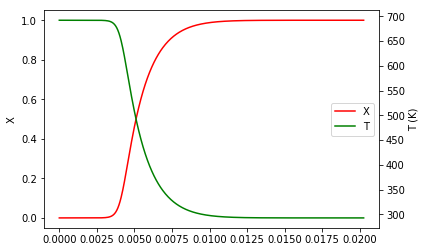

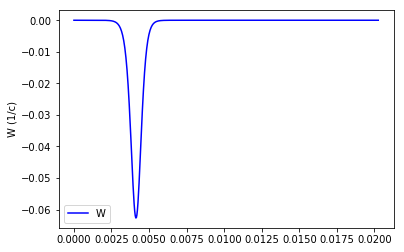

49


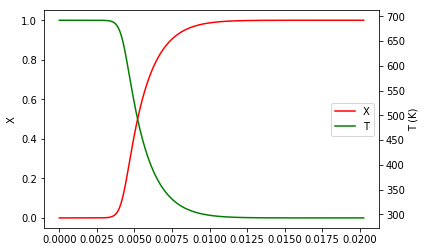

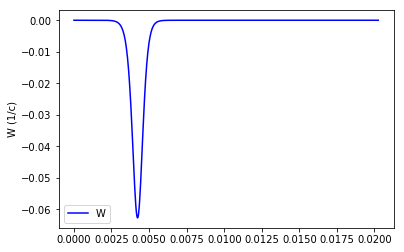

50


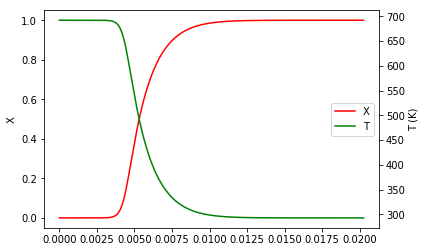

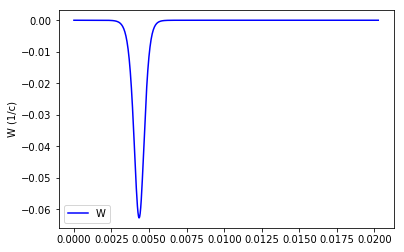

51


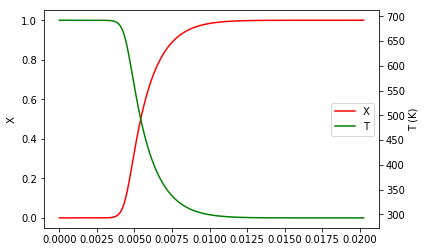

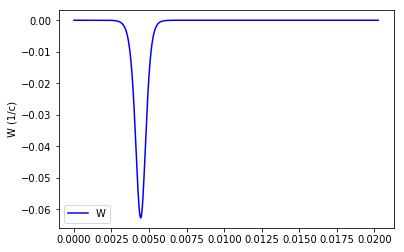

52


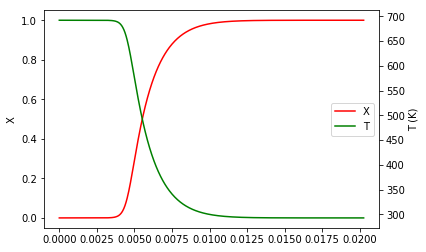

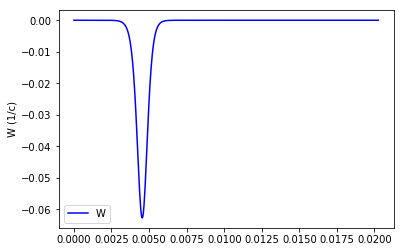

53


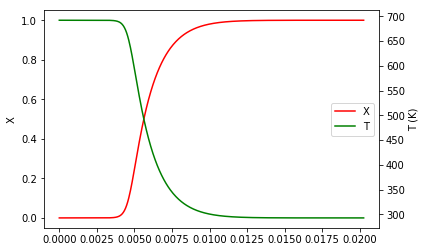

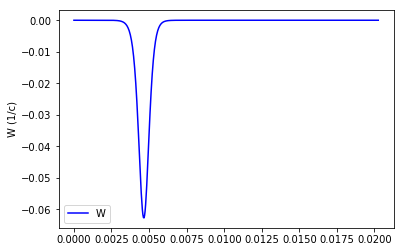

54


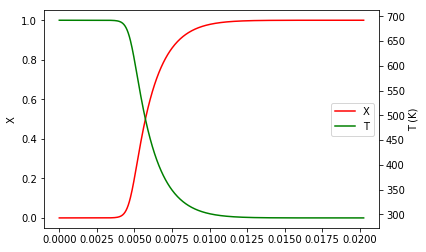

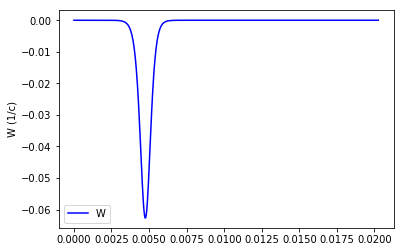

55


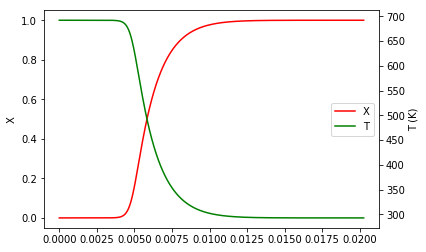

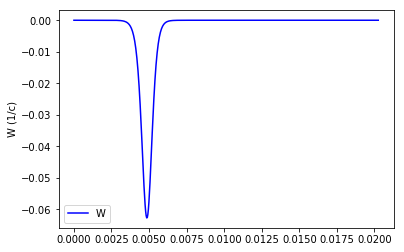

56


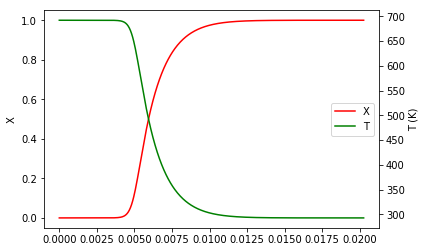

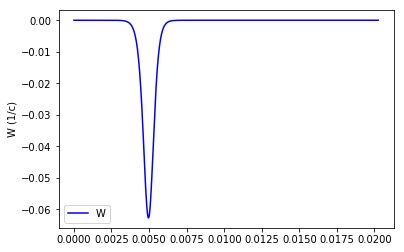

57


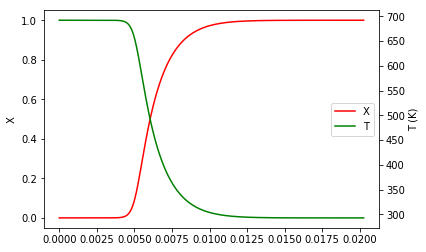

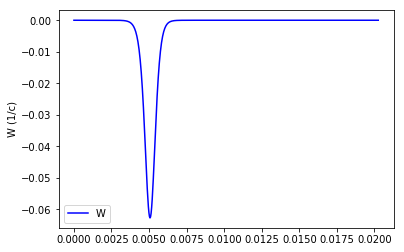

58


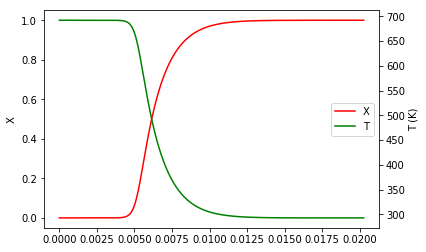

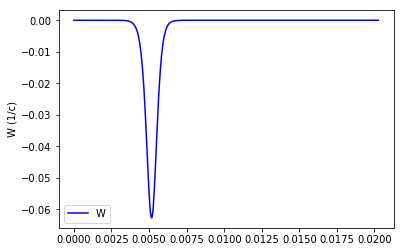

59


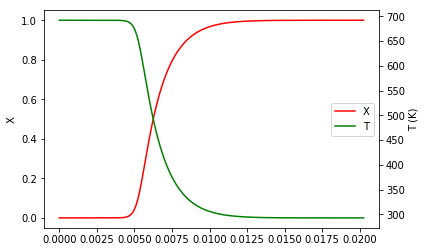

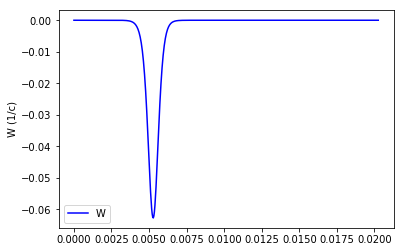

60


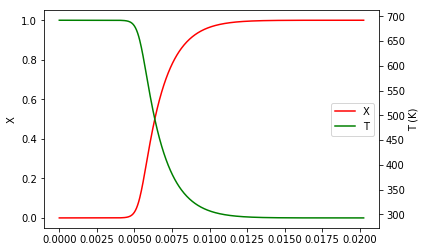

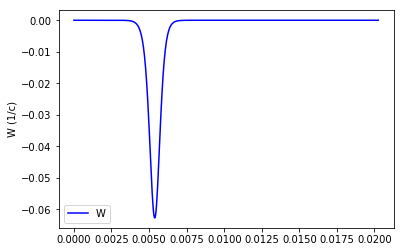

61


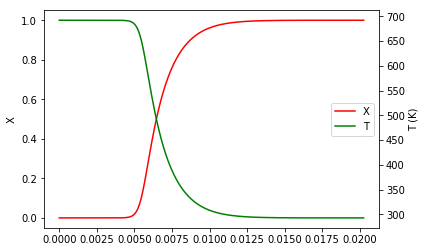

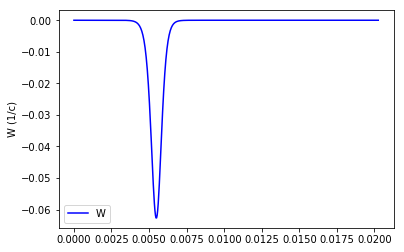

62


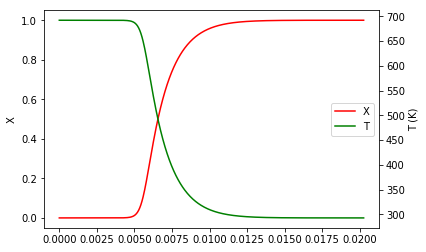

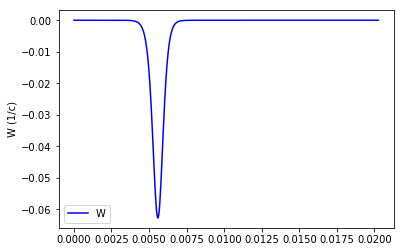

63


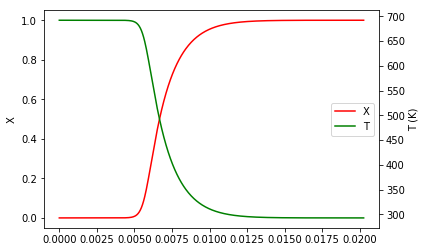

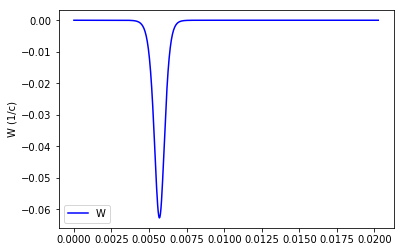

64


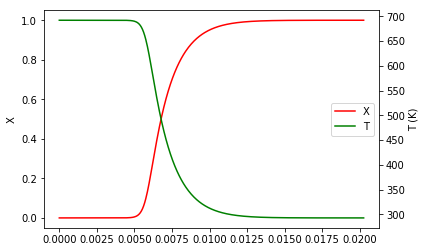

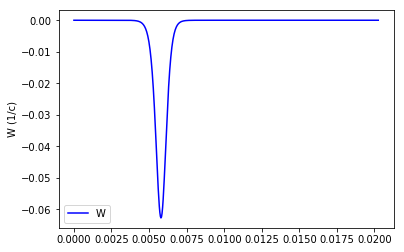

65


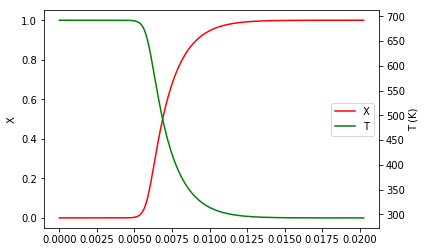

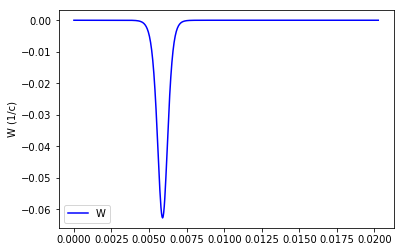

66


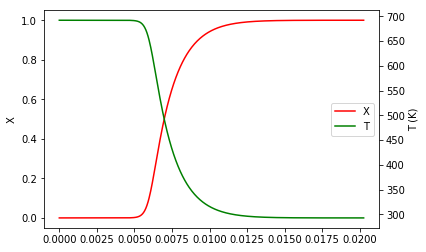

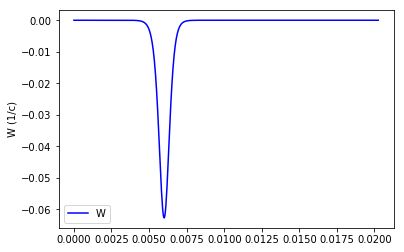

67


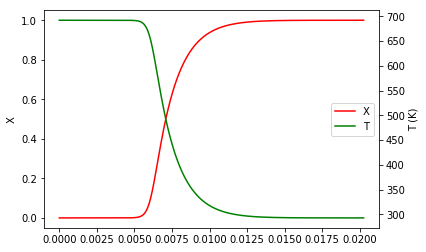

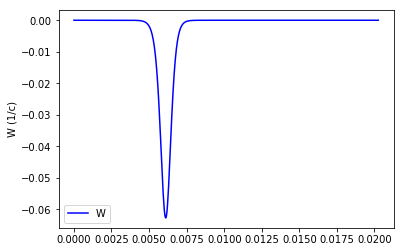

68


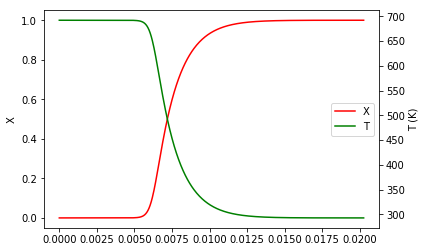

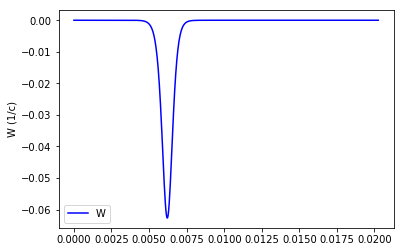

69


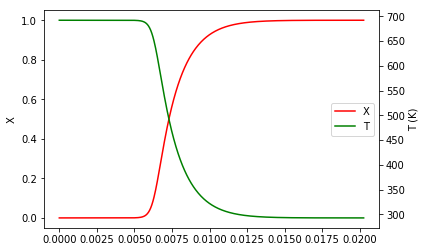

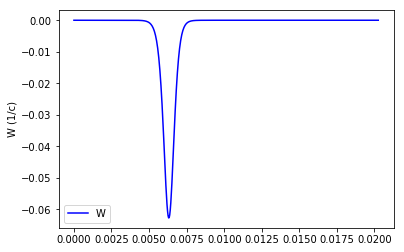

70


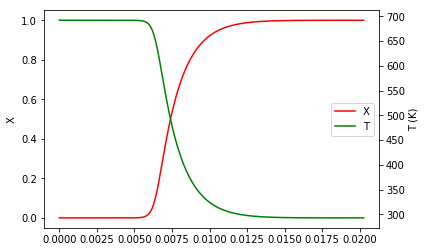

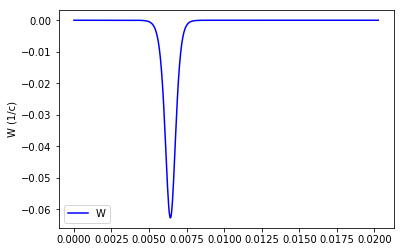

71


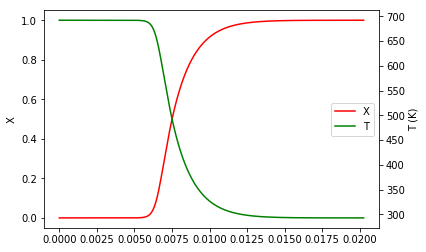

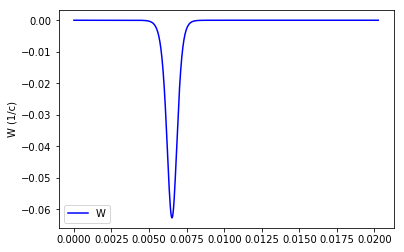

72


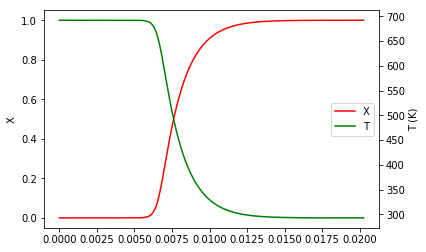

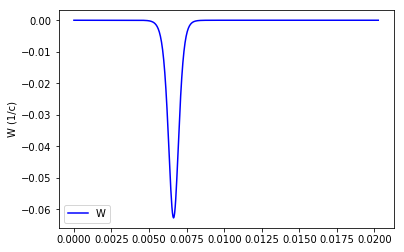

73


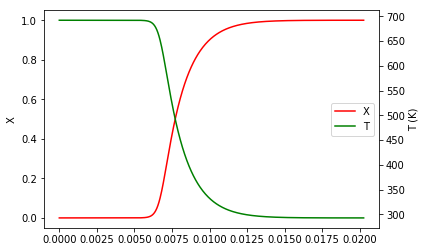

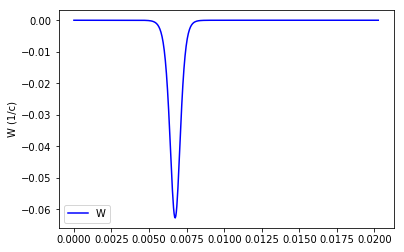

74


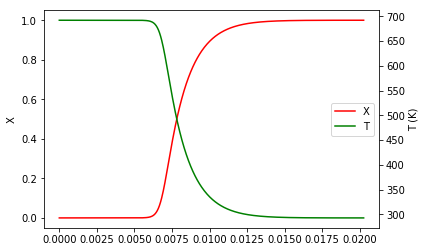

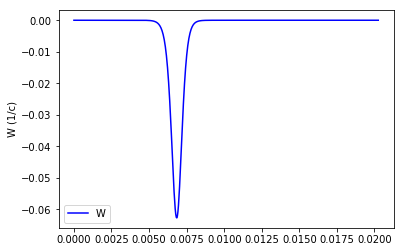

75


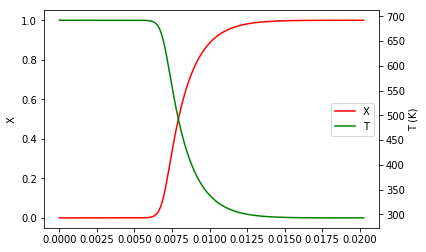

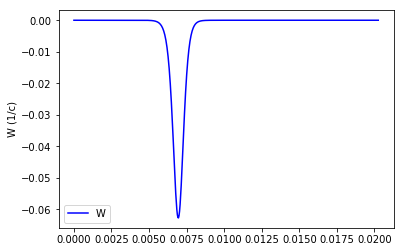

76


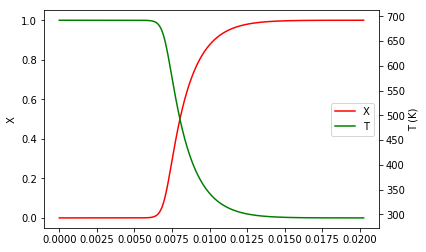

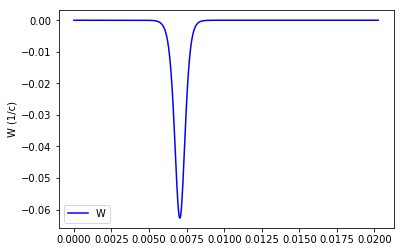

77


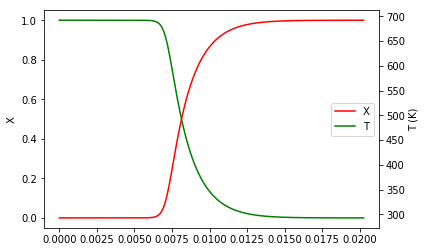

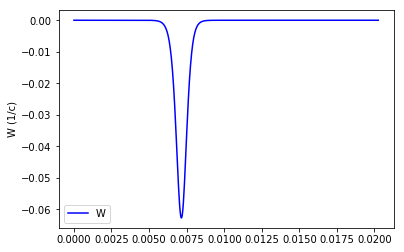

78


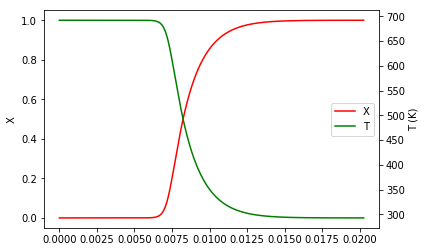

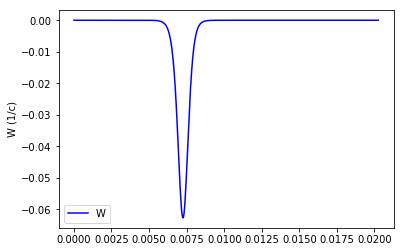

79


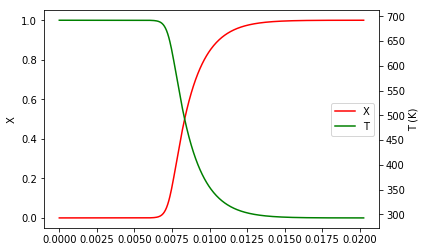

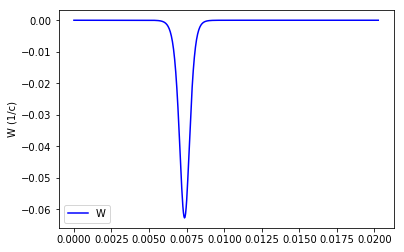

80


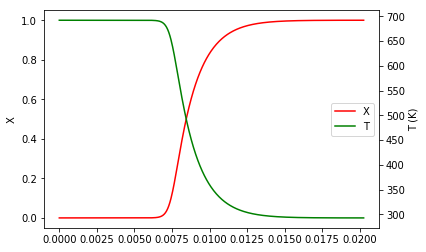

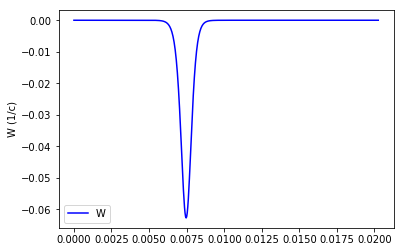

81


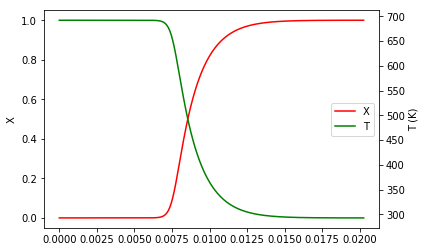

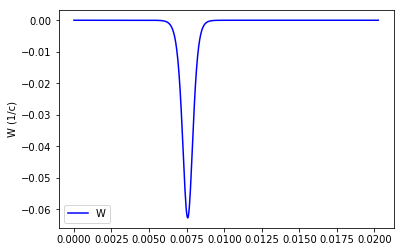

82


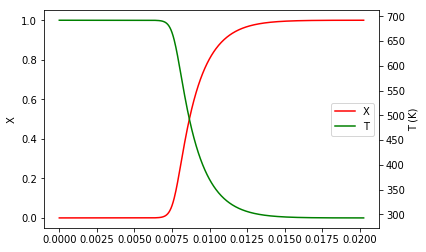

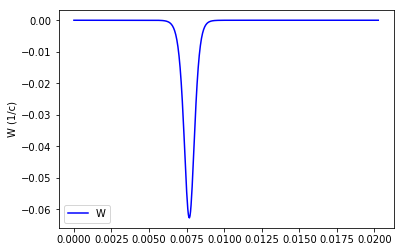

83


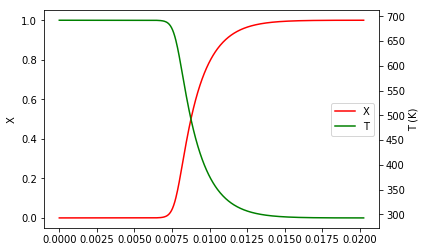

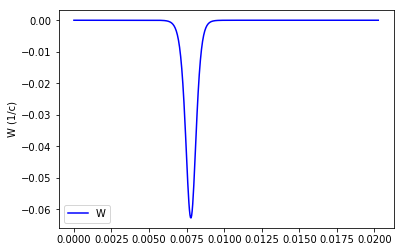

84


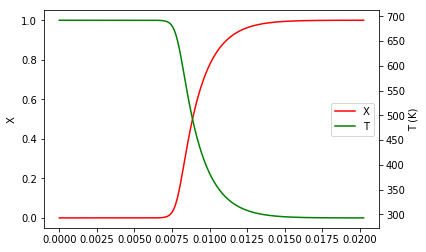

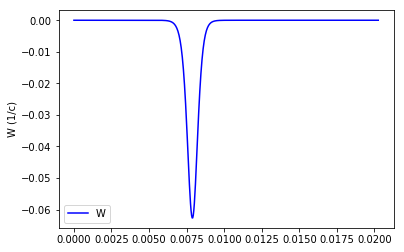

85


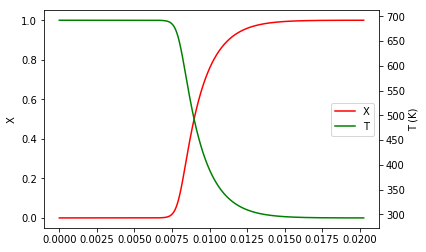

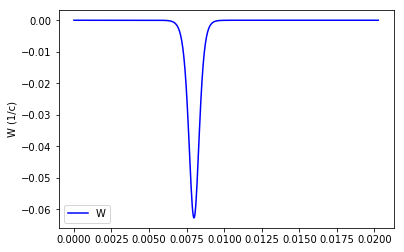

86


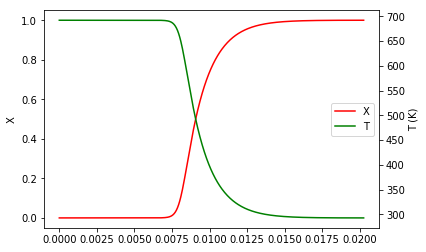

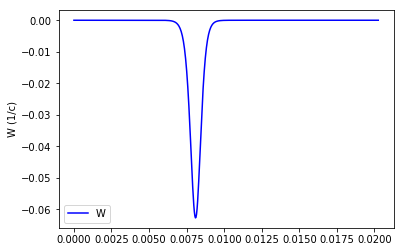

87


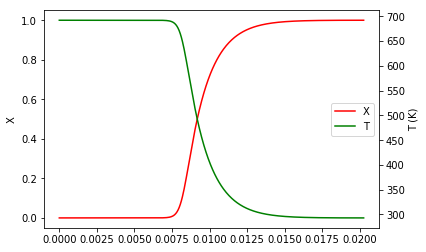

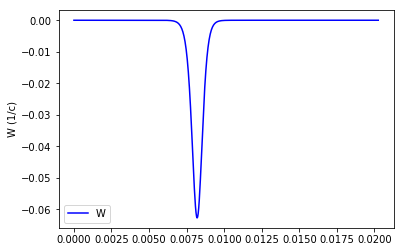

88


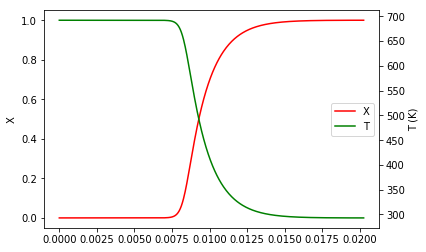

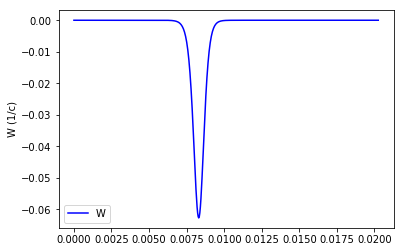

89


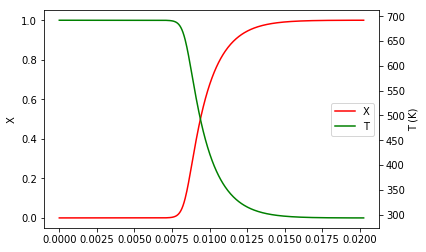

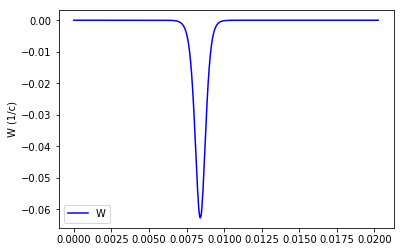

90


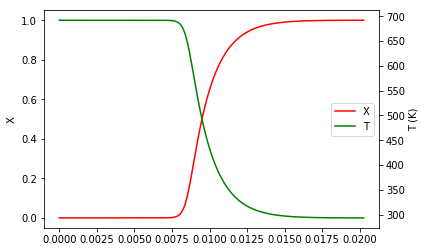

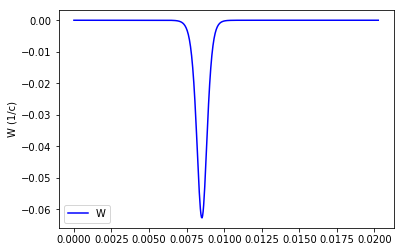

91


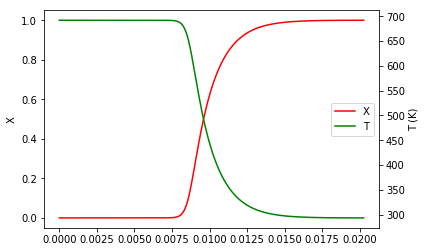

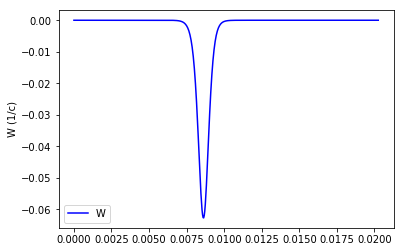

92


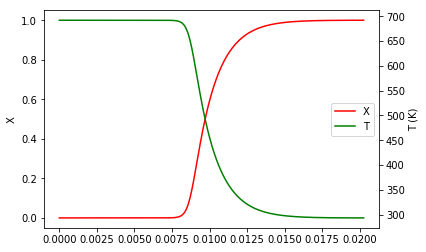

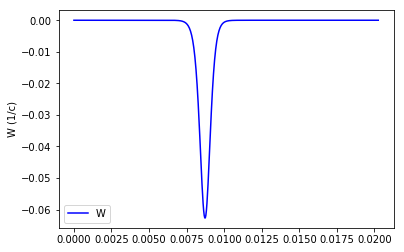

93


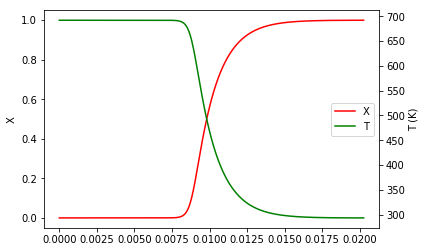

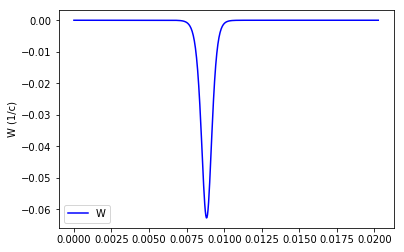

94


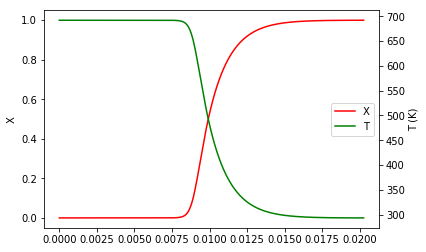

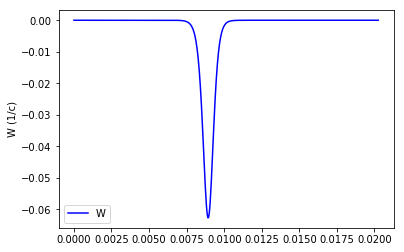

95


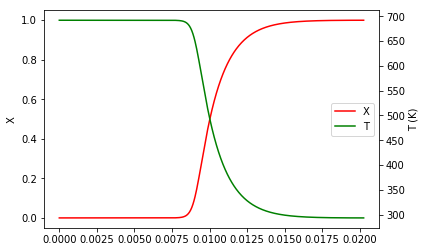

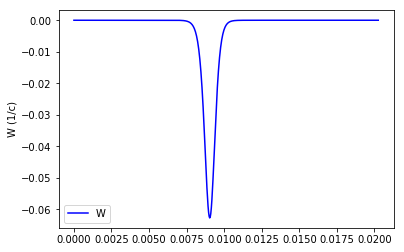

96


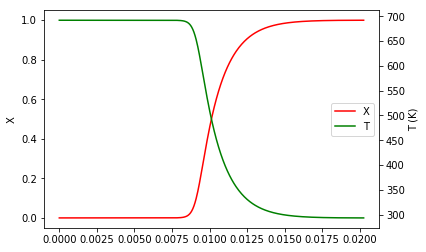

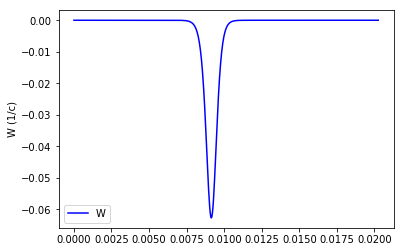

97


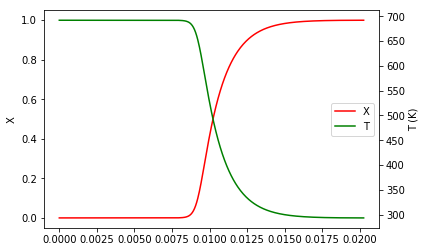

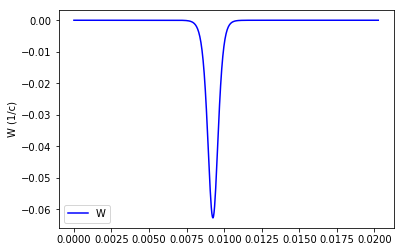

98


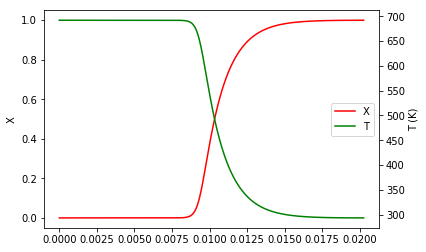

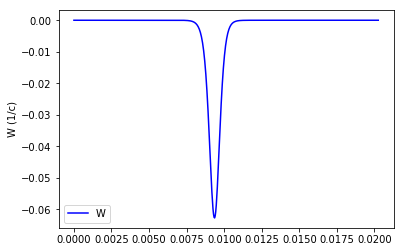

99


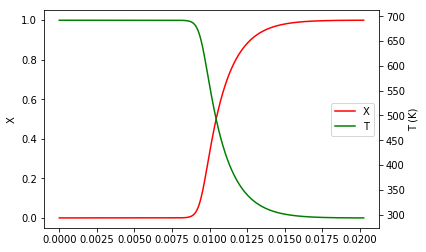

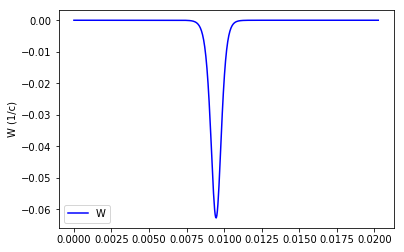

In [13]:
zs = np.arange(0, L, dz)
T = np.zeros([times, steps], dtype = float)
X = np.zeros([times, steps], dtype = float)
W = np.zeros([times, steps], dtype = float)
print(np.shape(zs), np.shape(T))

for (i,z) in enumerate(zs):
    X[0,i] = x0(z)
    T[0,i] = t0(z)
W[0,:] = W_(X[0,:], T[0,:])

for time in range(times):
    print(time)
    if time > 0:
        X[time, 0] = 0
        T[time, 0] = T_m
        (X[time, 1:-1], T[time, 1:-1]) = solve(X[time - 1, 1:-1], T[time - 1, 1:-1])
        X[time, -1] = X[time, -2]
        T[time, -1] = T[time, -2]
        W[time, : ] = W_(X[time, :], T[time, :])
            
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax2 = fig.add_axes(ax1.get_position(), frameon=False)
    l1, = ax1.plot(zs, X[time,:], label = 'X', color = 'red')
    l2, = ax2.plot(zs, T[time,:], label = 'T', color = 'green')
    
    ax1.set_ylabel('X')
    ax2.set_ylabel('T (K)')
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.set_xticks([])
    plt.legend([l1, l2], ['X', 'T'], loc=7)
    plt.show()
    
    l3, = plt.plot(zs, W[time,:], label = 'W', color = 'blue')
    plt.ylabel('W (1/c)')
    plt.legend()
    plt.show()
    #W всегда отрицательно

In [105]:
# уменьшаю D постепенно до реального значения (D=8e-9 -- устойчиво, дальше -- колебания)
# при D=8e-9 увеличиваю K, регулярный режим
# при D=8e-9 увеличиваю E and K : K*e^(-E/(R*T_m) = const ~= 1.46
#   K *= 40 E=10*10^4 const=1.8 регулярный режим
#   K *= 1000 E = 12 * 10**4 const=1.4 все слишком плохо
#   K *= 180 E = 11 * 10**4 const=1.43 колебания расходящиеся
#   K *= 5 E=9*10^4 const=1.3 регулярный режим
#   K *= 12 E=9.5*10^4 const=1.3 регулярный режим
#   K *= 70 E=10.5*10^4 const=1.33 колебания

T_0 = 293         # K
Q = 7.9 * 10**5   # Дж/кг 
C = 1980          # Дж/кг*К 
T_m = T_0 + Q / C # K
K = 70 * 1.6 * 10**6   # 1/с
E = 10.5 * 10**4     # Дж/моль
R = 8.314         # Дж/моль*К
alpha = 1         # 
po = 830          # кг/м^3
lambd = 0.13      # Дж/м*с*К
D = 8e-9          # 8 * 10**(-12) # м^2/с

beta = R * T_m / E
gamma = R * T_m**2 / (E * (T_m - T_0))

U = ( 2*K*lambd / (Q*po*(T_m - T_0)) * (R*T_m**2/E)**2 * math.exp(-E/(R*T_m)) * T_0 / T_m ) ** 0.5
dd = D / U
dh = lambd / (po * C * U)
dr = dh * beta

dz = dr / 4
L  = 10 * dh
steps = round(L / dz) + 1 

dt = dz / U
times = 100 

print('D =',"%.2e" % D, 'м^2/с')
print('K =',"%.2e" % K, '1/с')
print('E =',E, 'Дж/моль')
print('U =',"%.6f" % U, 'м/с')
print('dd =',"%.6f" % dd, 'м')
print('dh =',"%.6f" % dh, 'м')
print('dr =',"%.6f" % dr, 'м')
print('dz =',"%.6f" % dz, 'м')
print('L =',"%.3f" % L, 'м')
print('steps =',steps)
print('dt =',"%.2f" % dt, 'с')
print('times =',times)

print(K*math.exp(-E/(R*T_m)))

D = 8.00e-09 м^2/с
K = 1.12e+08 1/с
E = 105000.0 Дж/моль
U = 0.000028 м/с
dd = 0.000282 м
dh = 0.002791 м
dr = 0.000153 м
dz = 0.000038 м
L = 0.028 м
steps = 731
dt = 1.35 с
times = 100
1.3275160116238989


In [106]:
def solve(X_old, T_old):
    # predictor X
    alpha_ = np.zeros([len(X_old)], dtype = float)
    beta_  = np.zeros([len(X_old)], dtype = float)
    
    a_ = D / dz**2
    b_ = -2*D / dz**2 - 1. / dt
    c_ = D / dz**2
    d_  = np.zeros([len(X_old)], dtype = float)
    for i in range(len(X_old)):
        d_[i] = K * X_old[i]**alpha * math.exp(-E/(R*T_old[i])) - X_old[i] / dt
    
    alpha_[0] = -c_ / b_
    beta_[0] = d_[0] / b_
    for i in range(1, len(alpha_)):
        alpha_[i] = -c_ / (a_ * alpha_[i - 1] + b_)
        beta_[i] = (d_[i] - a_ * beta_[i - 1]) / (a_ * alpha_[i - 1] + b_)
    
    X_pred = np.zeros([len(X_old)], dtype = float)
    X_pred[-1] = (d_[-1] - a_ * beta_[-2]) / (a_ * alpha_[-2] + b_ + c_)
    for i in range(len(X_pred) - 1, 0, -1):
        X_pred[i-1] = alpha_[i-1] * X_pred[i] + beta_[i-1]     
    
    # predictor T
    alpha_ = np.zeros([len(X_old)], dtype = float)
    beta_  = np.zeros([len(X_old)], dtype = float)
    
    a_ = lambd / (po * C * dz**2)
    b_ = -2*lambd / (po * C * dz**2) - 1. / dt
    c_ = lambd / (po * C * dz**2)
    d_  = np.zeros([len(X_old)], dtype = float)
    for i in range(len(X_old)):
        d_[i] = -Q / C * K * X_old[i]**alpha * math.exp(-E/(R*T_old[i])) - T_old[i] / dt 
    d_[0] -= a_ * T_m
    
    
    alpha_[0] = -c_ / b_
    beta_[0] = d_[0] / b_
    for i in range(1, len(alpha_)):
        alpha_[i] = -c_ / (a_ * alpha_[i - 1] + b_)
        beta_[i] = (d_[i] - a_ * beta_[i - 1]) / (a_ * alpha_[i - 1] + b_)
    
    T_pred = np.zeros([len(X_old)], dtype = float)
    T_pred[-1] = (d_[-1] - a_ * beta_[-2]) / (a_ * alpha_[-2] + b_ + c_)
    for i in range(len(T_pred) - 1, 0, -1):
        T_pred[i-1] = alpha_[i-1] * T_pred[i] + beta_[i-1] 
    #T_pred[0] = (d_[0] - c_ * T_pred[1]) / (a_ + b_)
        
    # corrector X
    alpha_ = np.zeros([len(X_old)], dtype = float)
    beta_  = np.zeros([len(X_old)], dtype = float)
    
    a_ = D / dz**2
    b_ = -2*D / dz**2 - 1. / dt
    c_ = D / dz**2
    d_  = np.zeros([len(X_old)], dtype = float)
    for i in range(len(X_old)):
        d_[i] = K * X_pred[i]**alpha * math.exp(-E/(R*T_pred[i])) - X_pred[i] / dt
    
    alpha_[0] = -c_ / b_
    beta_[0] = d_[0] / b_
    for i in range(1, len(alpha_)):
        alpha_[i] = -c_ / (a_ * alpha_[i - 1] + b_)
        beta_[i] = (d_[i] - a_ * beta_[i - 1]) / (a_ * alpha_[i - 1] + b_)
    
    X_corr = np.zeros([len(X_old)], dtype = float)
    X_corr[-1] = (d_[-1] - a_ * beta_[-2]) / (a_ * alpha_[-2] + b_ + c_)
    for i in range(len(X_corr) - 1, 0, -1):
        X_corr[i-1] = alpha_[i-1] * X_corr[i] + beta_[i-1] 
    
    # corrector T
    alpha_ = np.zeros([len(X_old)], dtype = float)
    beta_  = np.zeros([len(X_old)], dtype = float)
    
    a_ = lambd / (po * C * dz**2)
    b_ = -2*lambd / (po * C * dz**2) - 1. / dt
    c_ = lambd / (po * C * dz**2)
    d_  = np.zeros([len(X_old)], dtype = float)
    for i in range(len(X_old)):
        d_[i] = -Q / C * K * X_pred[i]**alpha * math.exp(-E/(R*T_pred[i])) - T_pred[i] / dt 
    d_[0] -= a_ * T_m
    
    alpha_[0] = -c_ / b_
    beta_[0] = d_[0] / b_
    for i in range(1, len(alpha_)):
        alpha_[i] = -c_ / (a_ * alpha_[i - 1] + b_)
        beta_[i] = (d_[i] - a_ * beta_[i - 1]) / (a_ * alpha_[i - 1] + b_)
    
    T_corr = np.zeros([len(X_old)], dtype = float)
    T_corr[-1] = (d_[-1] - a_ * beta_[-2]) / (a_ * alpha_[-2] + b_ + c_)
    for i in range(len(T_corr) - 1, 0, -1):
        T_corr[i-1] = alpha_[i-1] * T_corr[i] + beta_[i-1] 
    #T_corr[0] = (d_[0] - c_ * T_corr[1]) / (a_ + b_)
    
    return (X_corr, T_corr)

(731,) (100, 731)
0


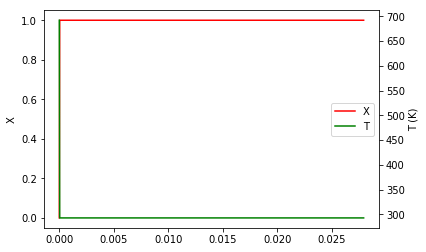

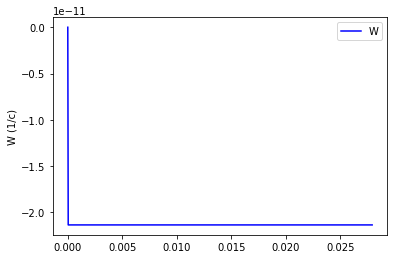

1


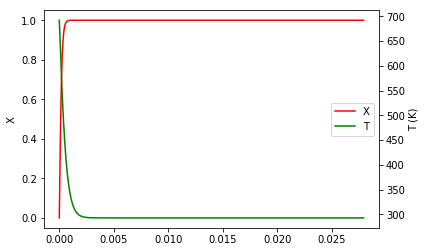

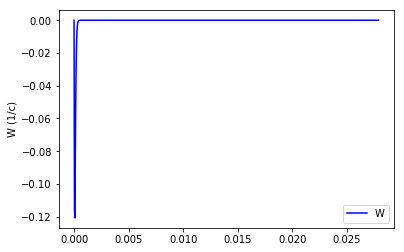

2


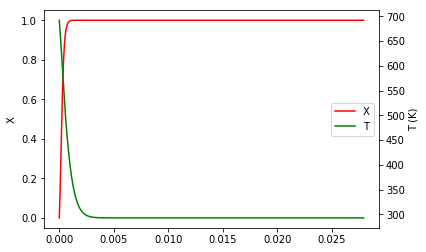

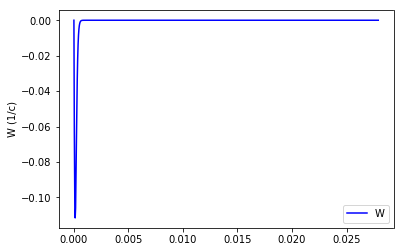

3


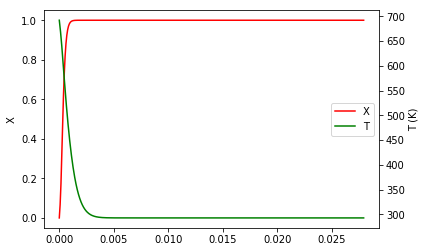

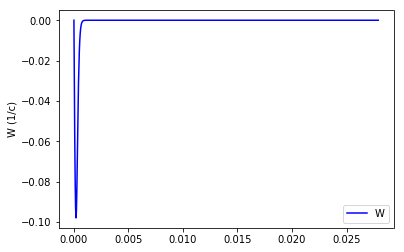

4


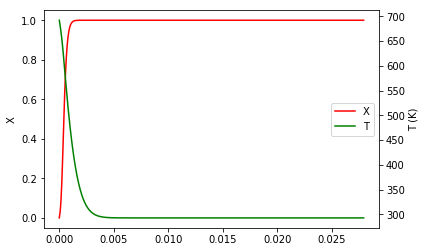

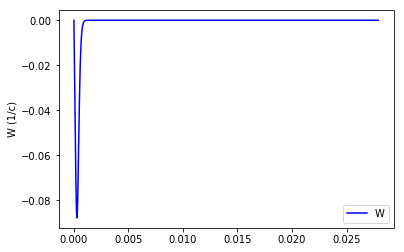

5


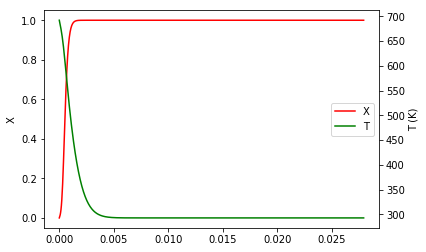

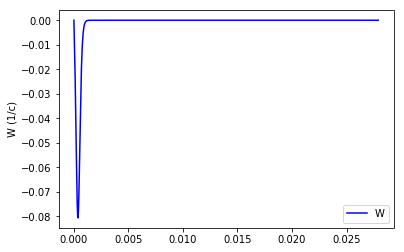

6


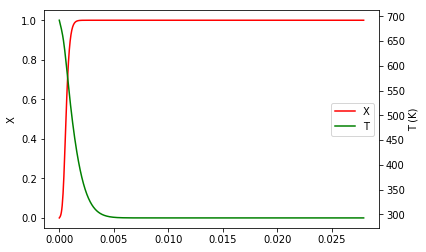

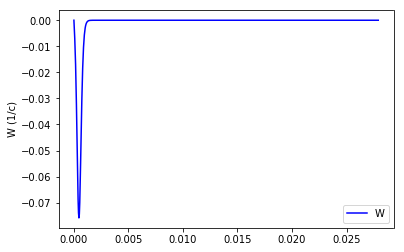

7


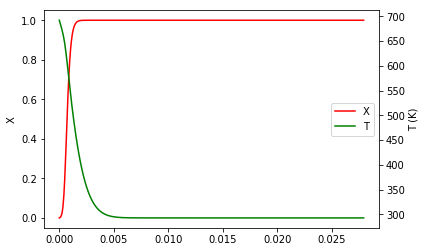

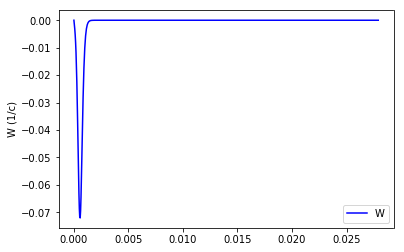

8


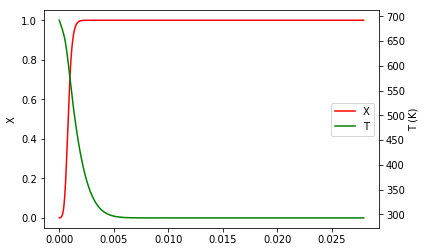

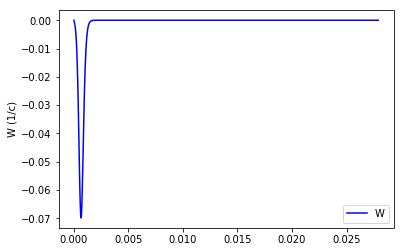

9


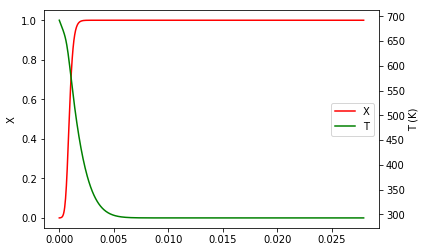

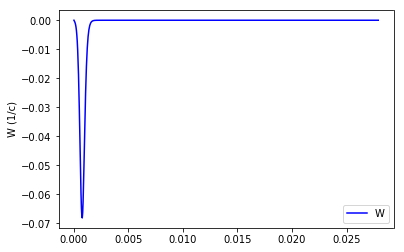

10


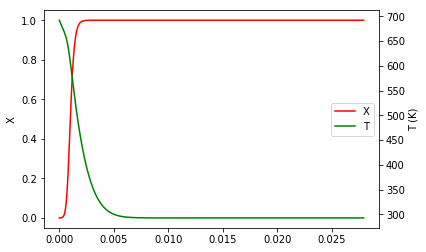

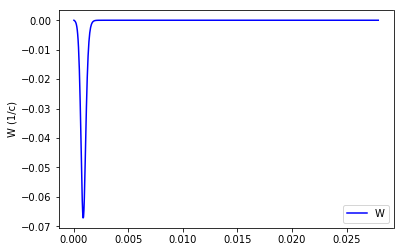

11


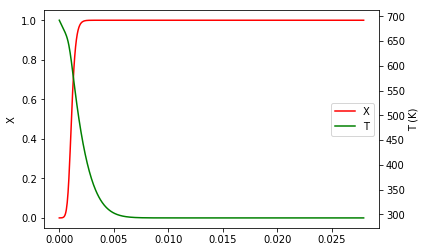

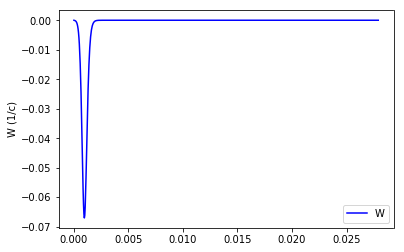

12


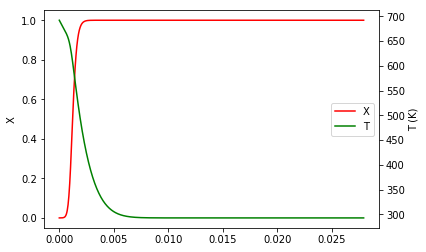

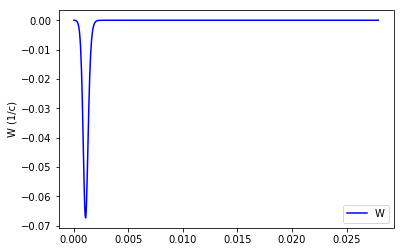

13


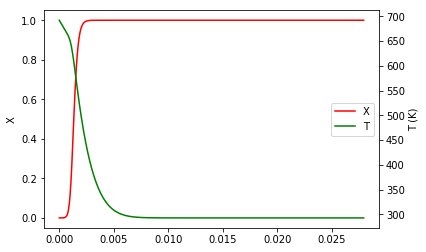

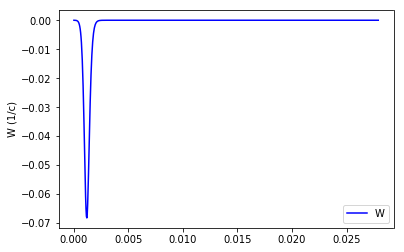

14


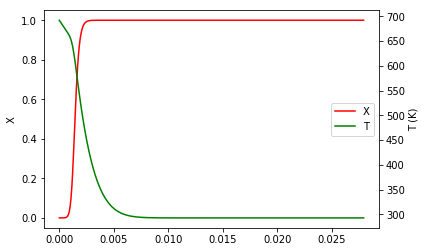

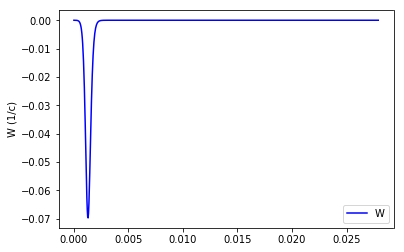

15


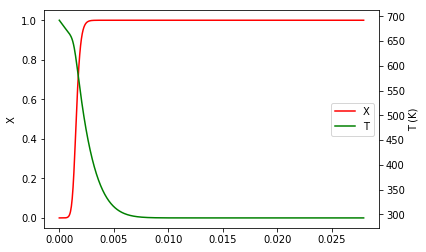

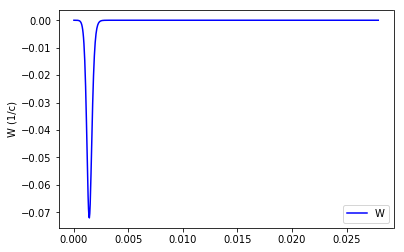

16


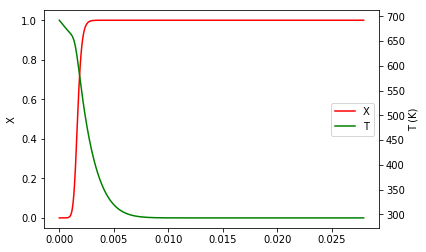

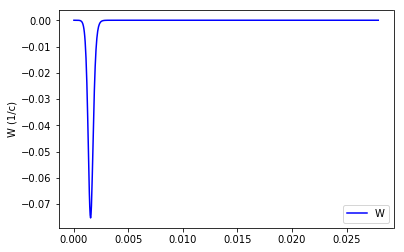

17


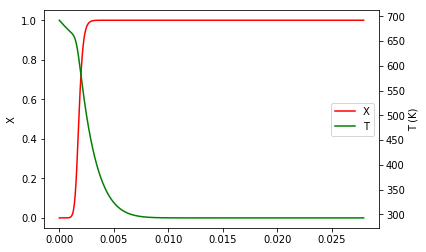

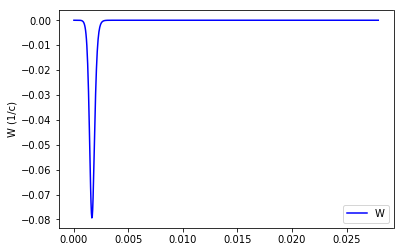

18


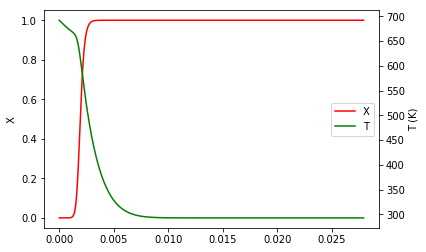

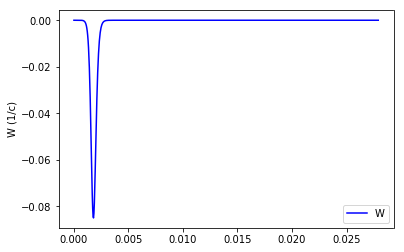

19


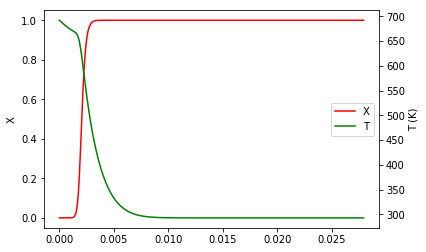

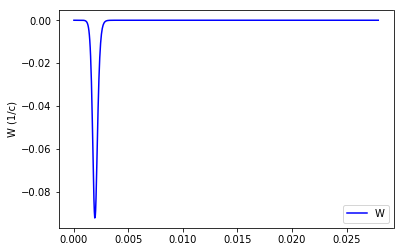

20


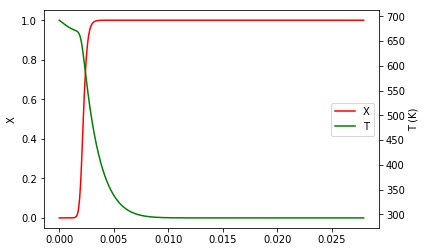

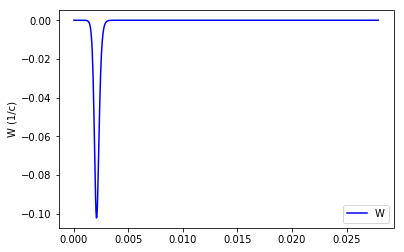

21


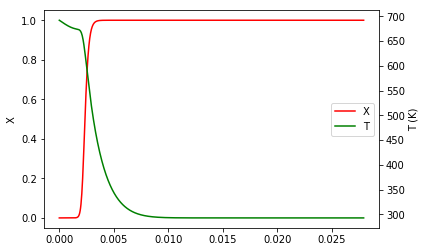

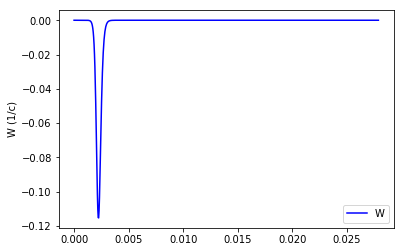

22


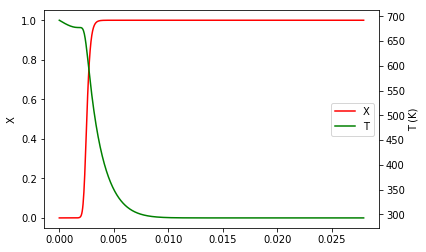

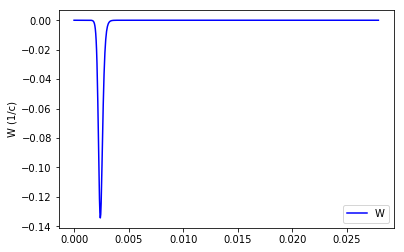

23


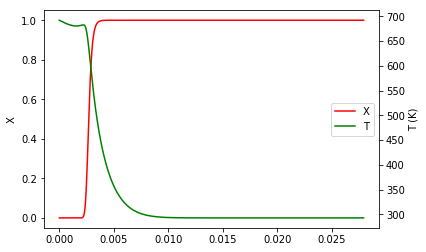

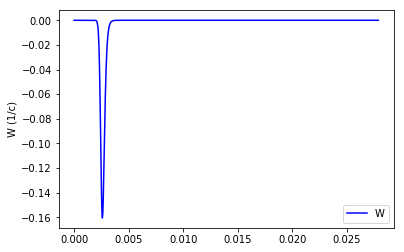

24


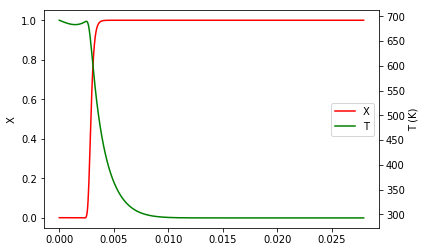

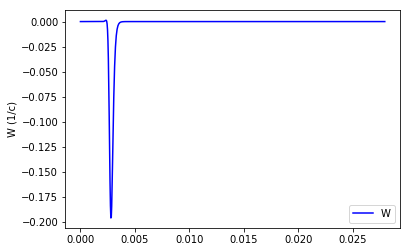

25


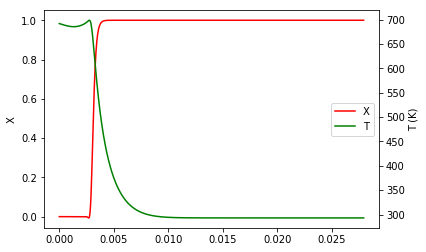

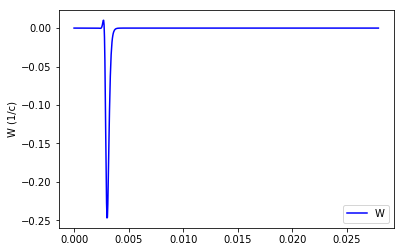

26


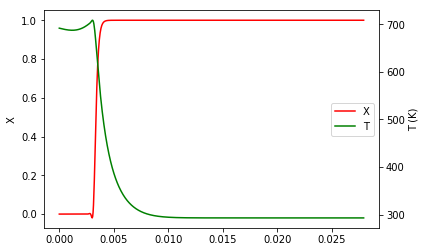

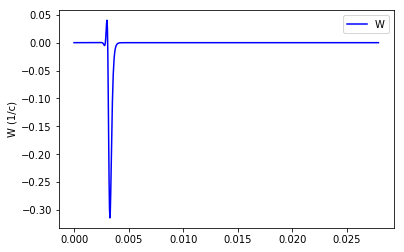

27


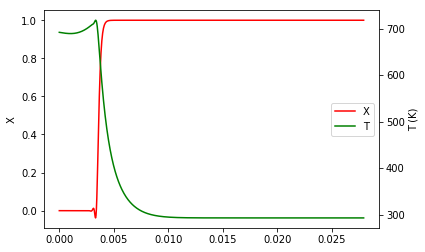

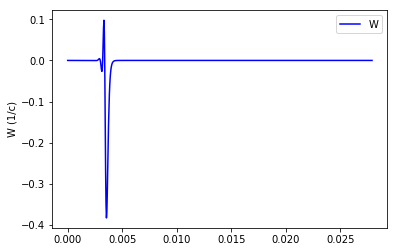

28


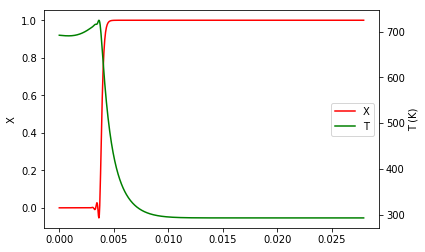

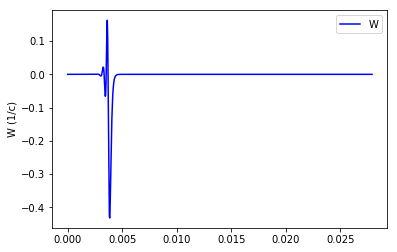

29


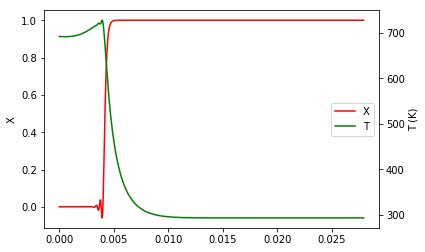

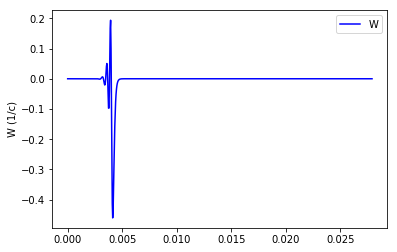

30


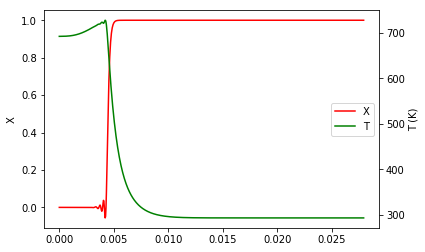

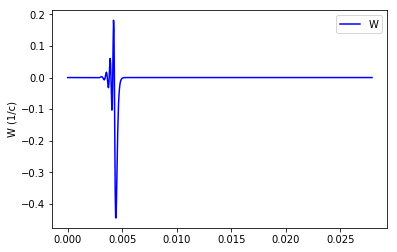

31


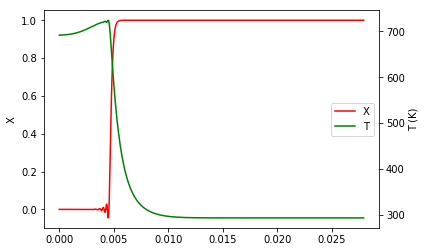

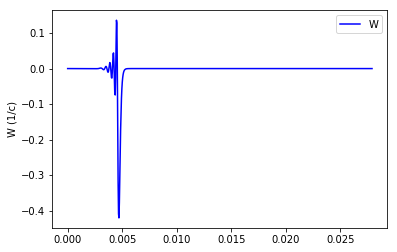

32


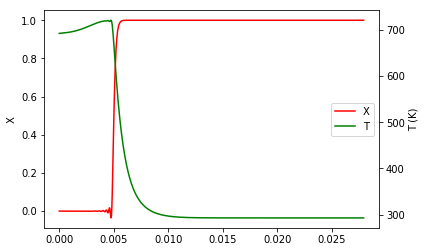

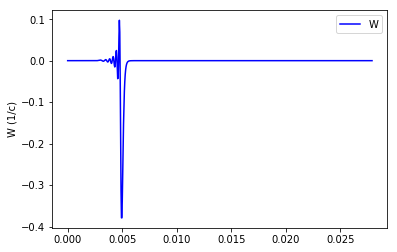

33


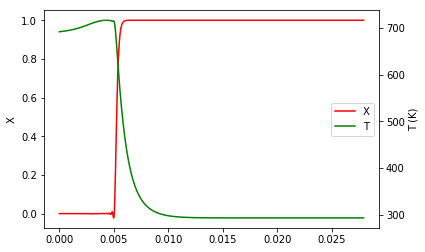

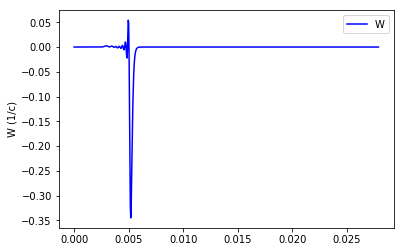

34


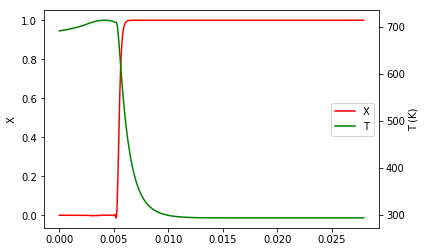

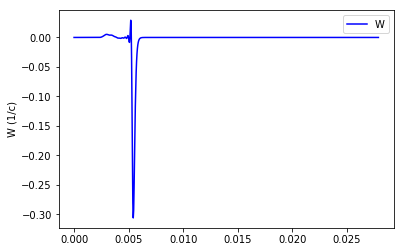

35


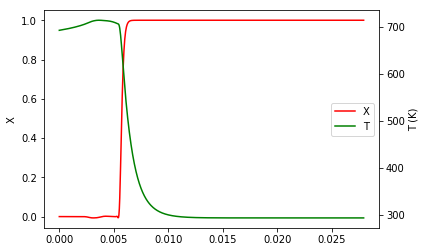

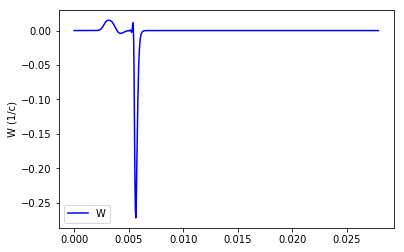

36


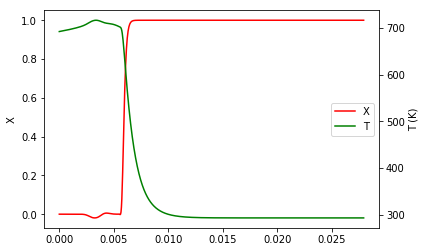

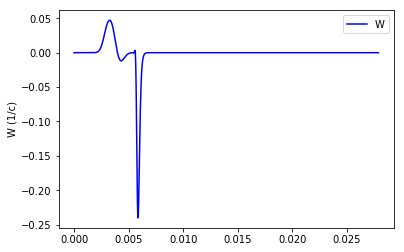

37


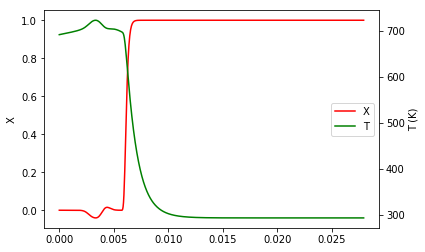

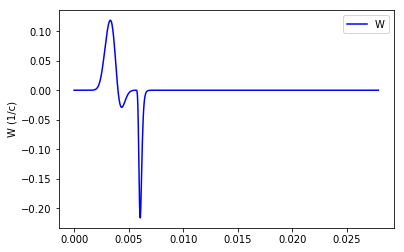

38


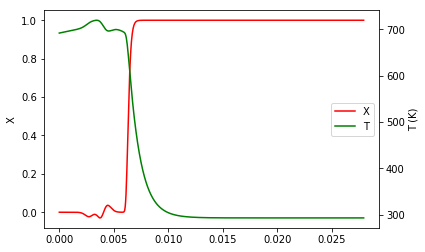

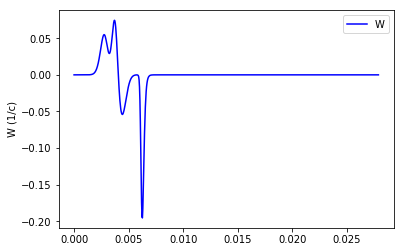

39


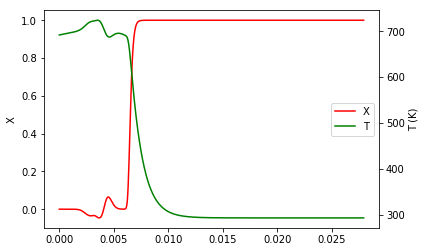

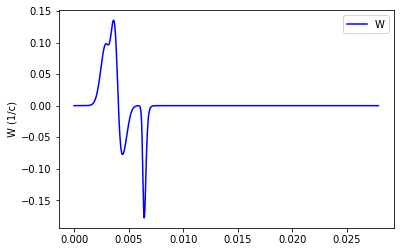

40


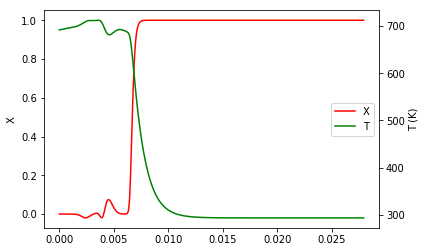

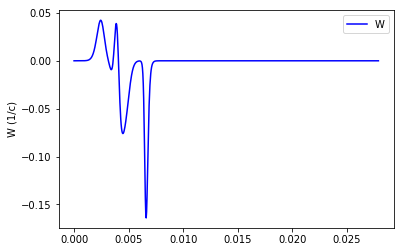

41


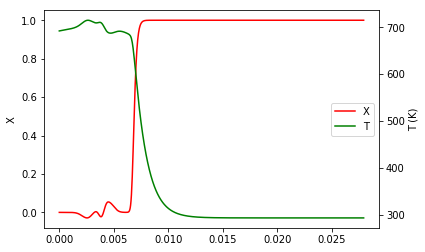

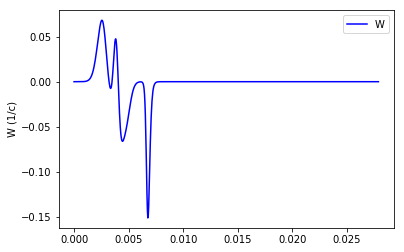

42


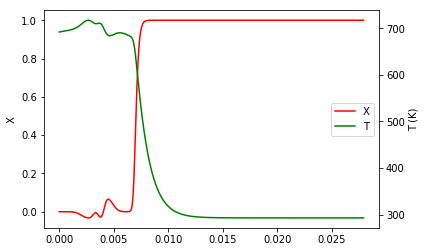

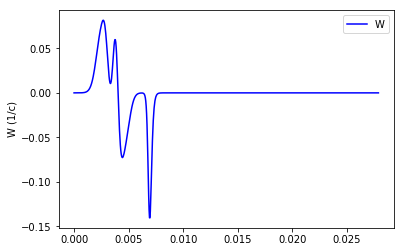

43


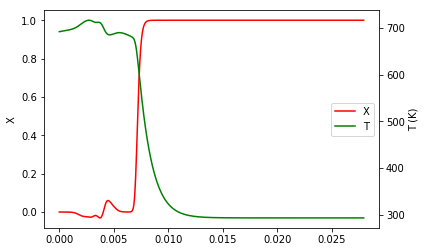

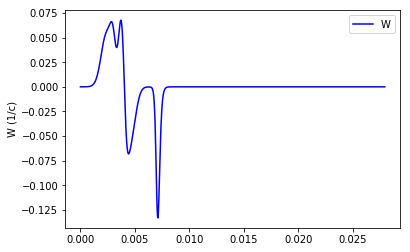

44


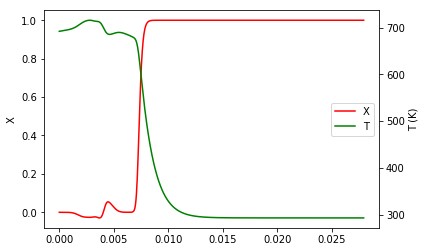

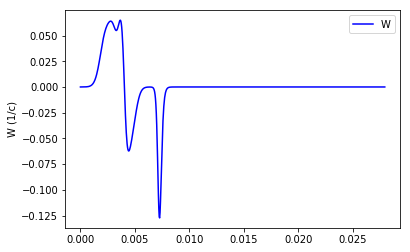

45


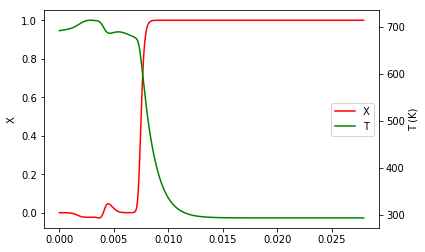

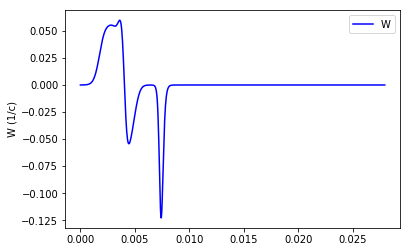

46


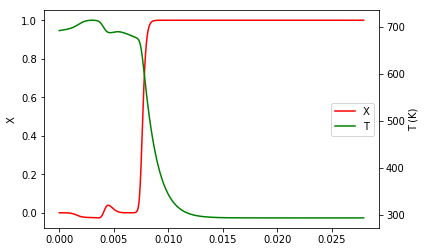

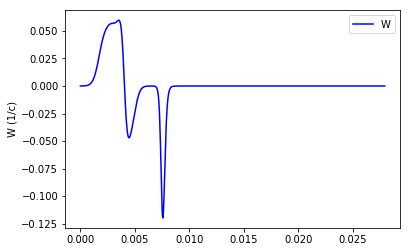

47


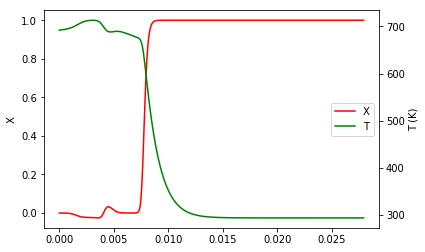

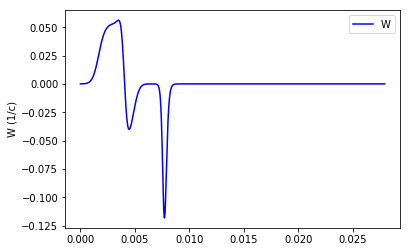

48


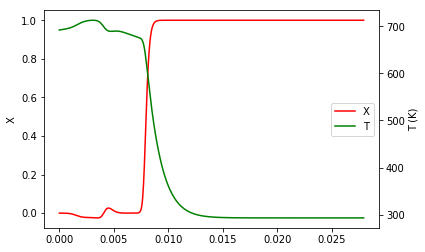

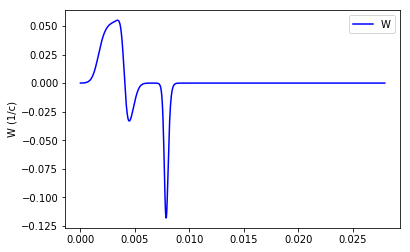

49


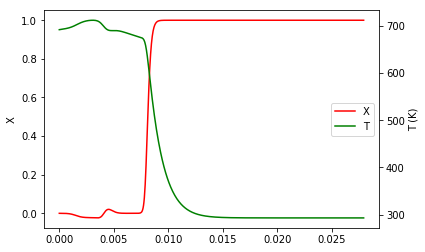

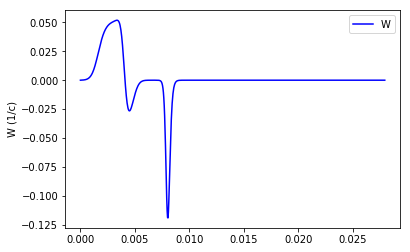

50


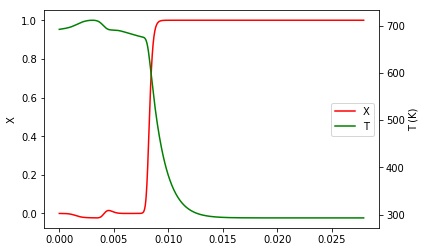

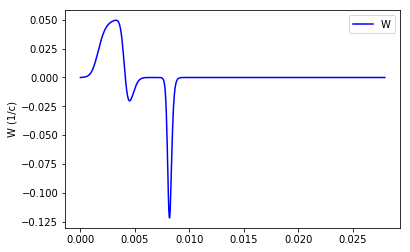

51


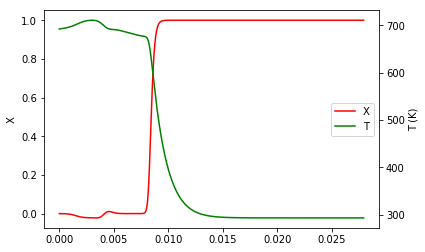

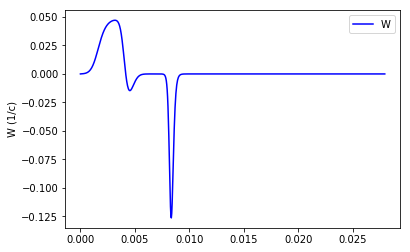

52


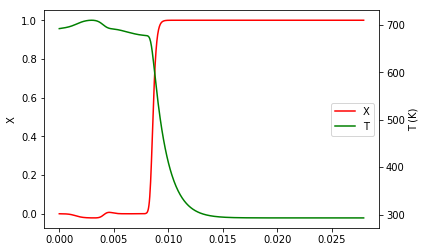

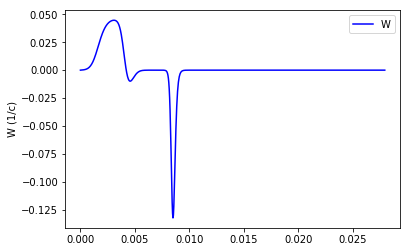

53


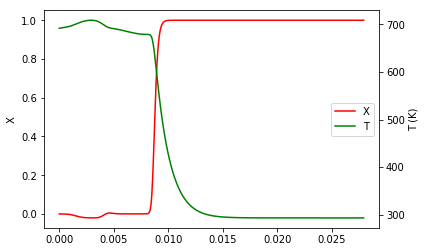

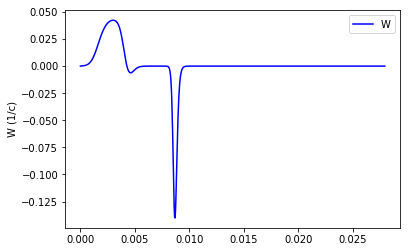

54


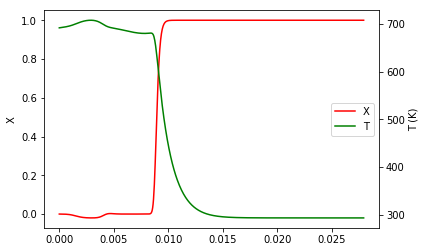

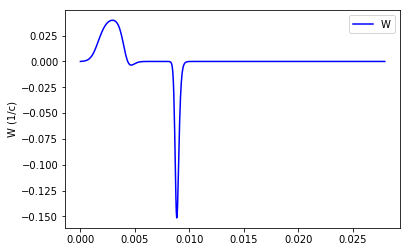

55


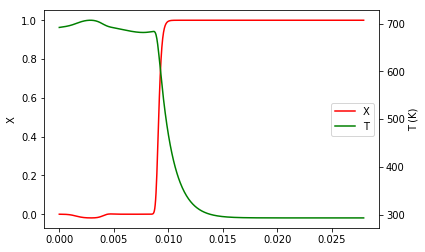

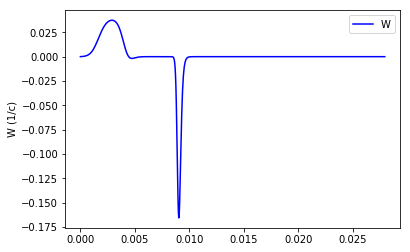

56


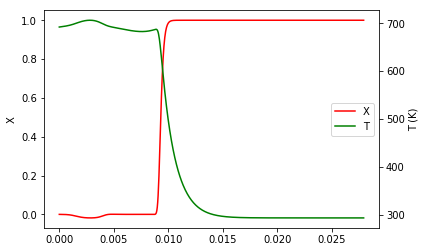

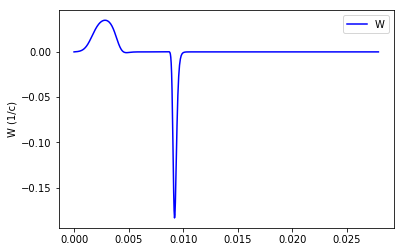

57


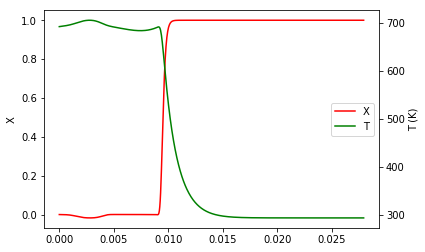

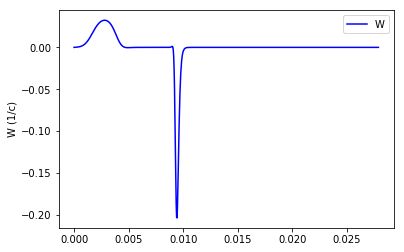

58


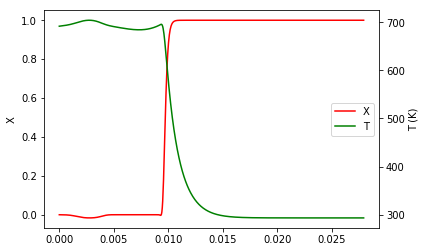

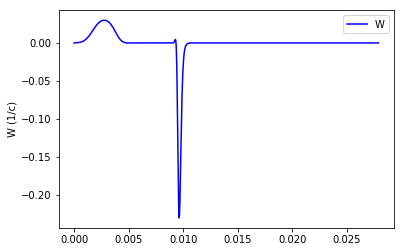

59


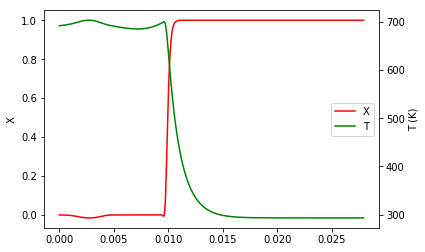

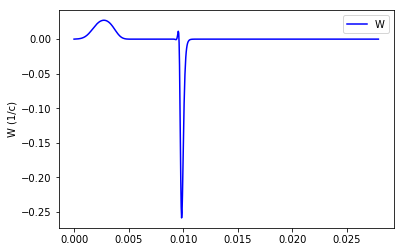

60


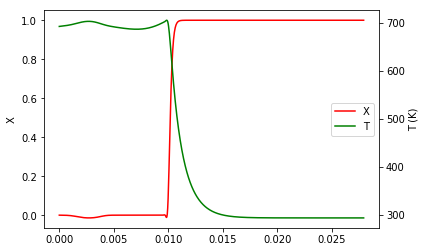

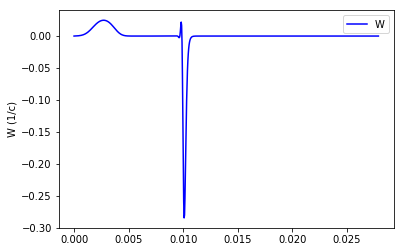

61


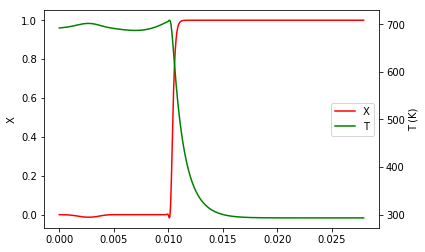

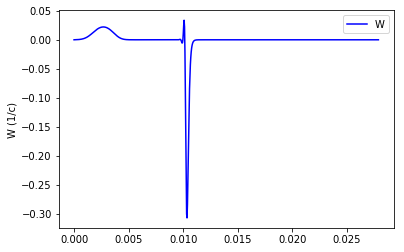

62


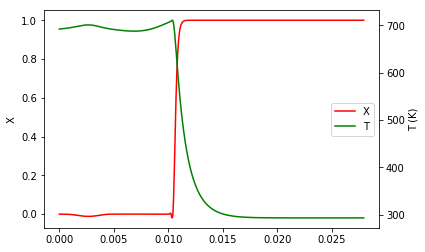

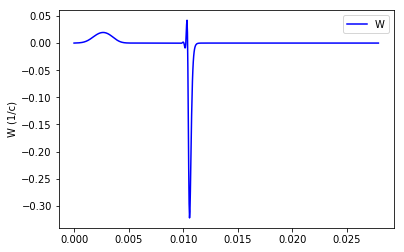

63


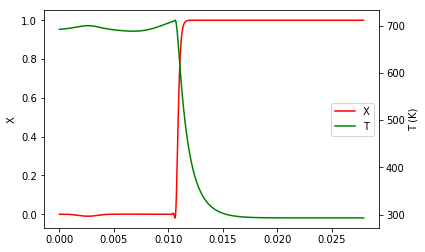

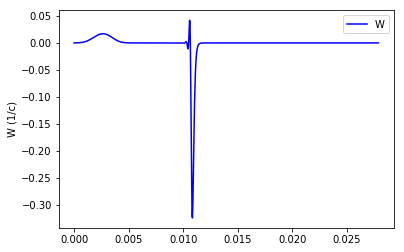

64


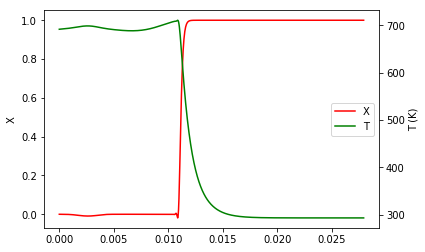

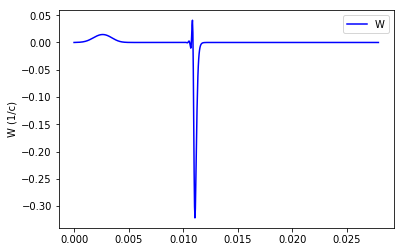

65


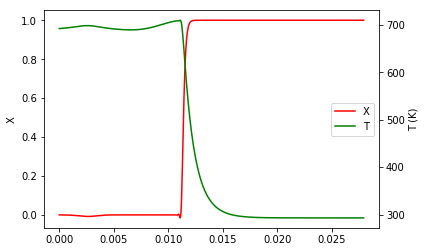

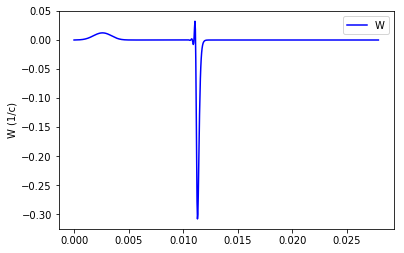

66


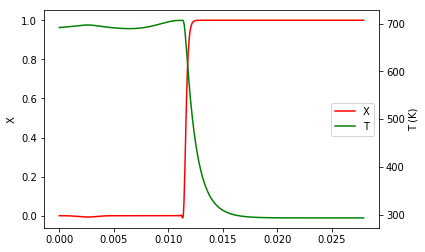

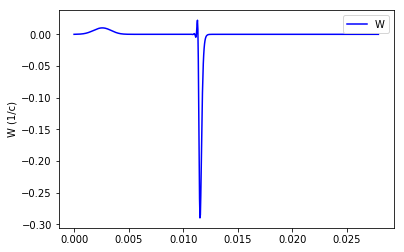

67


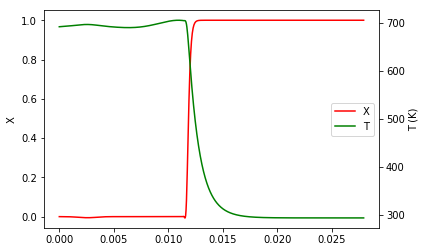

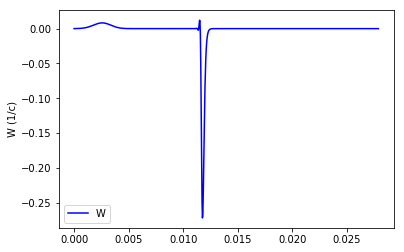

68


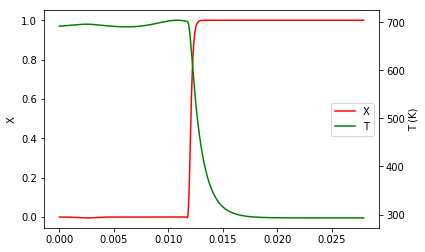

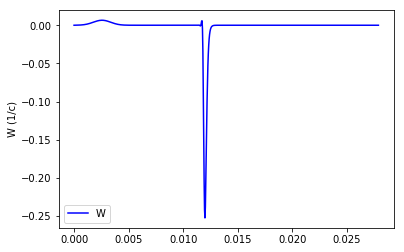

69


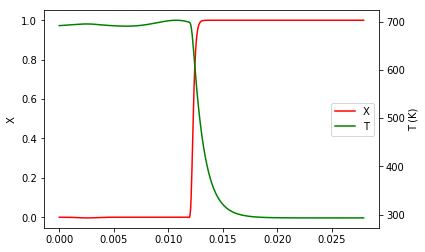

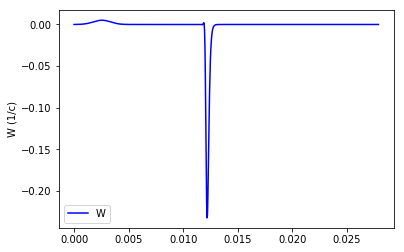

70


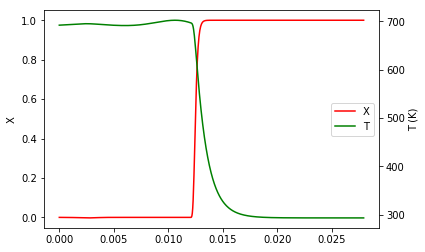

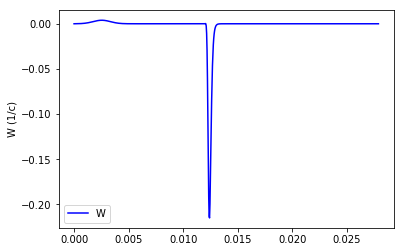

71


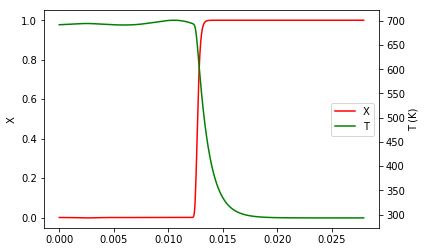

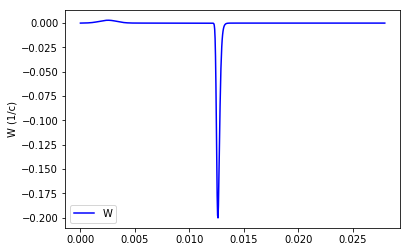

72


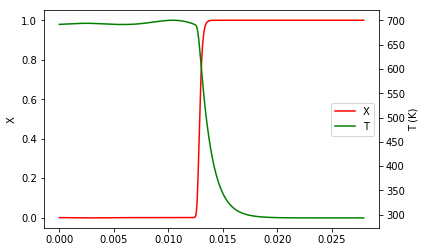

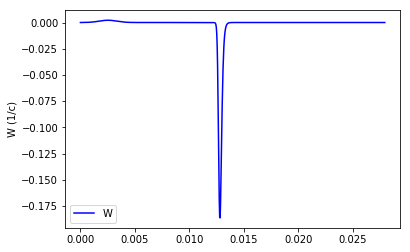

73


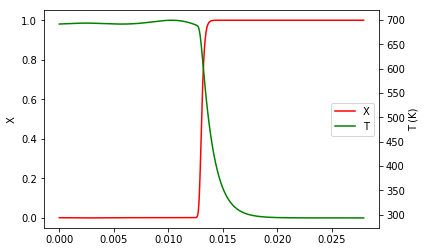

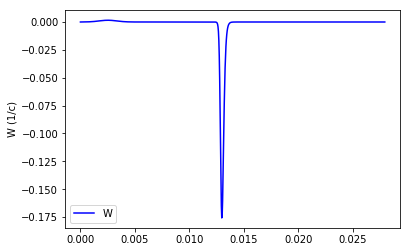

74


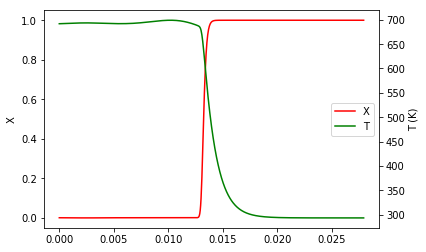

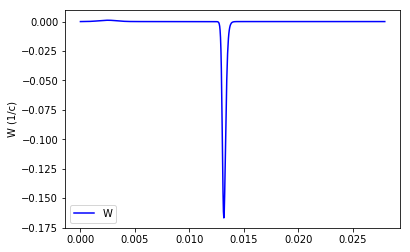

75


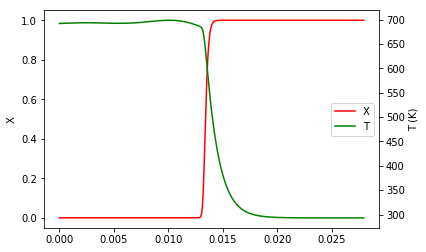

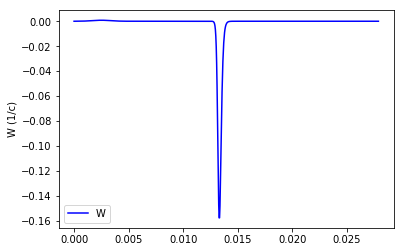

76


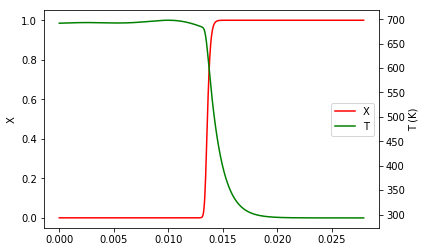

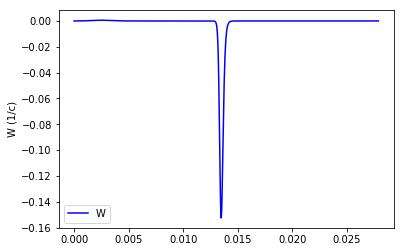

77


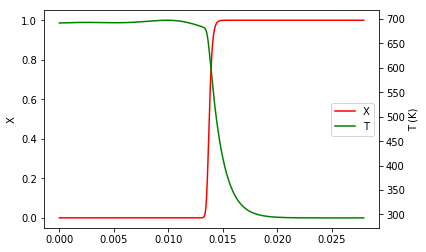

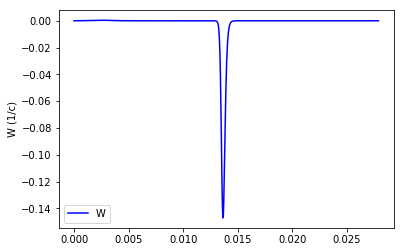

78


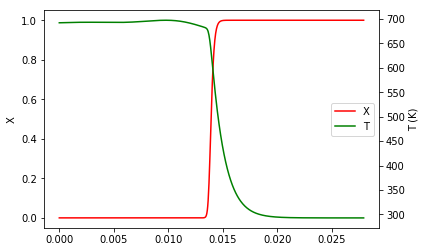

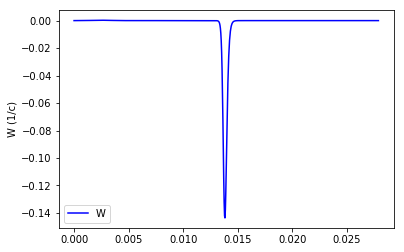

79


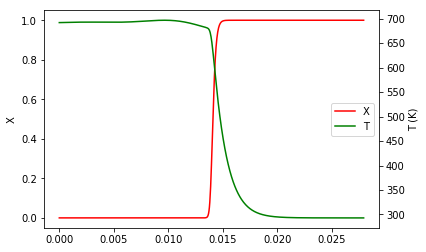

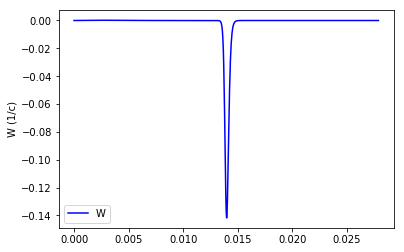

80


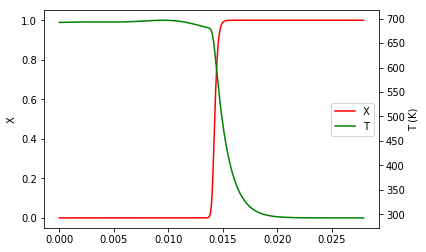

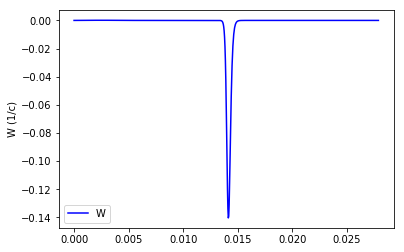

81


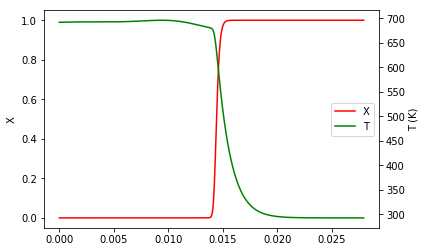

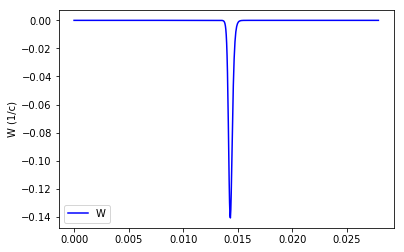

82


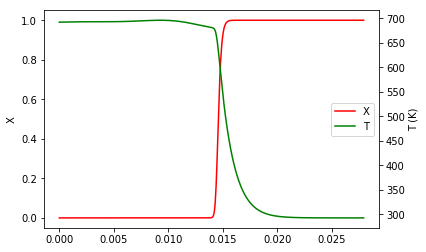

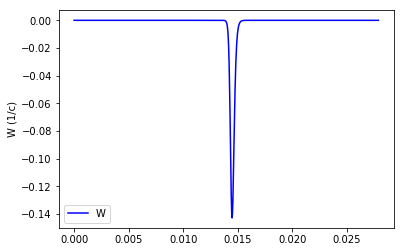

83


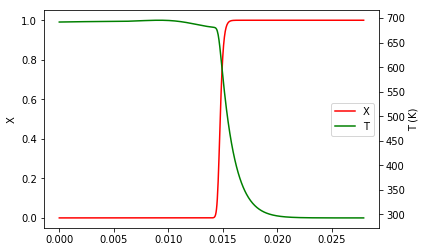

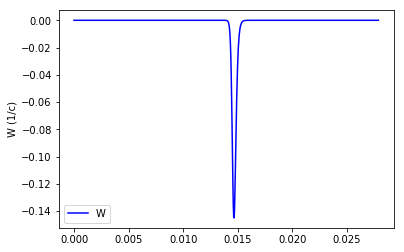

84


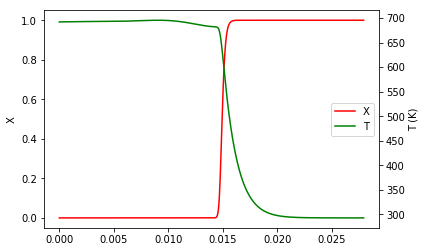

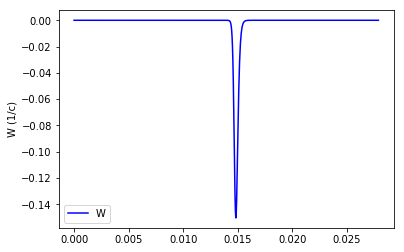

85


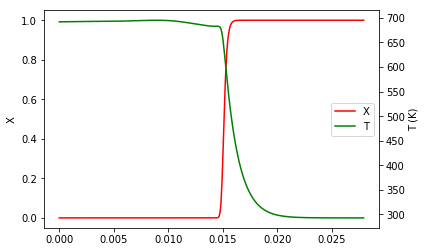

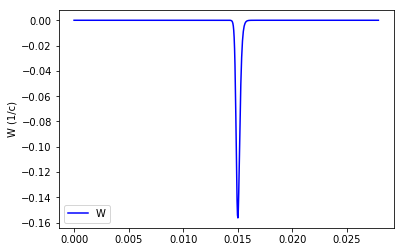

86


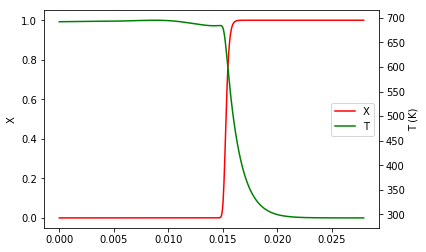

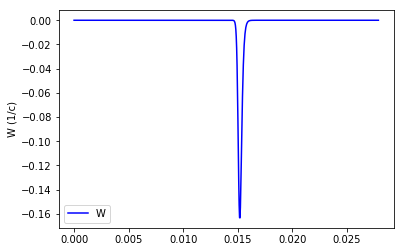

87


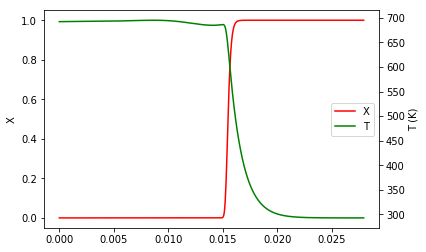

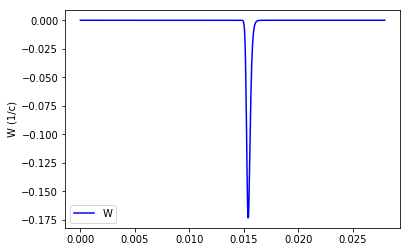

88


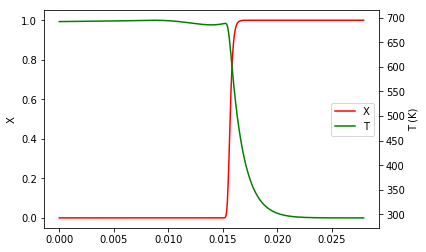

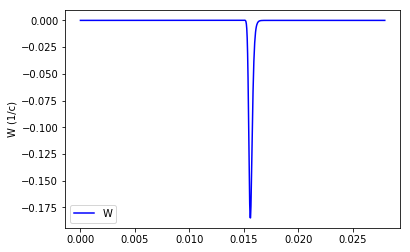

89


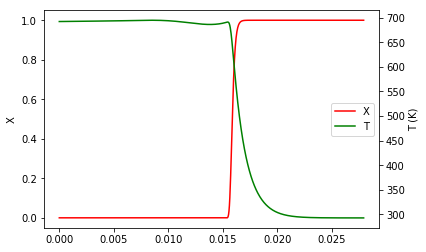

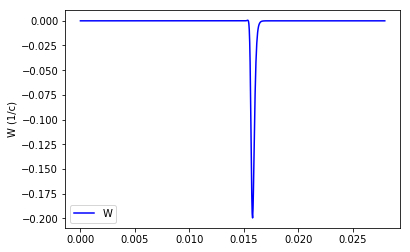

90


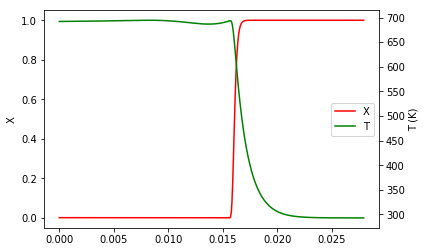

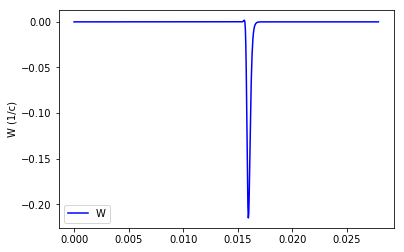

91


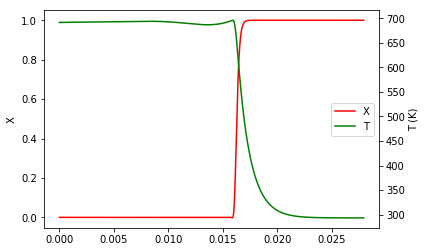

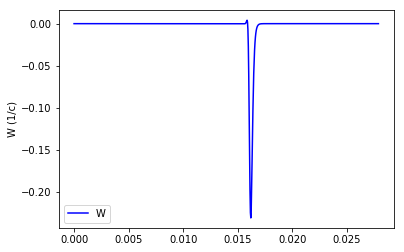

92


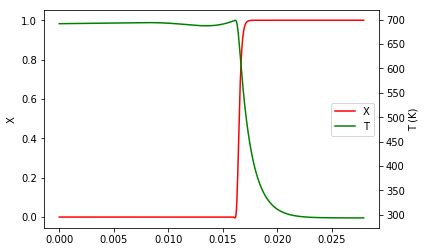

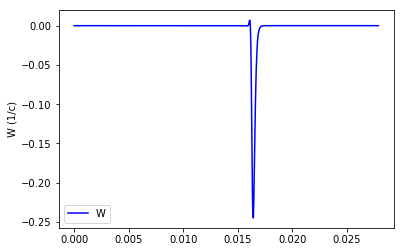

93


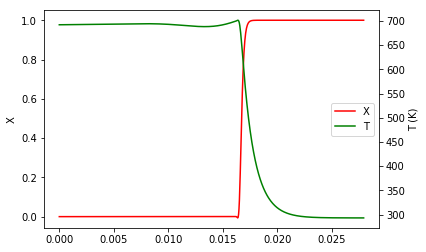

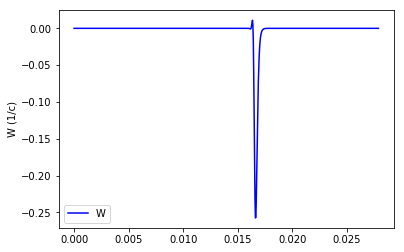

94


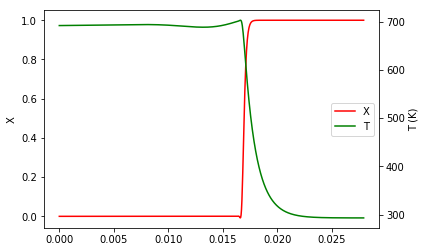

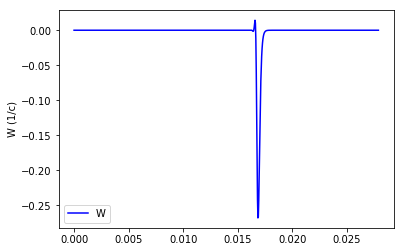

95


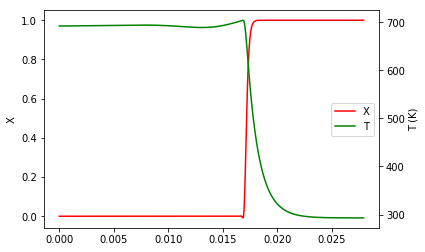

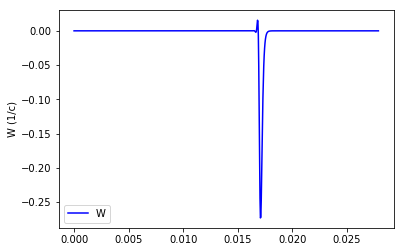

96


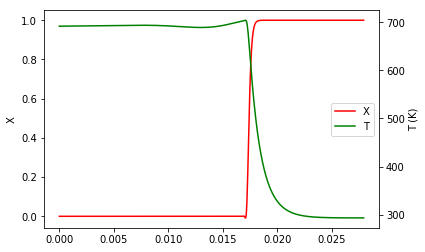

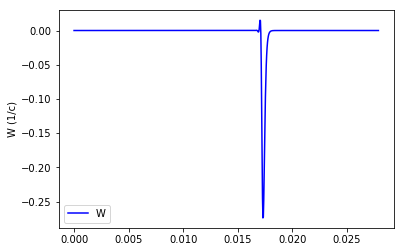

97


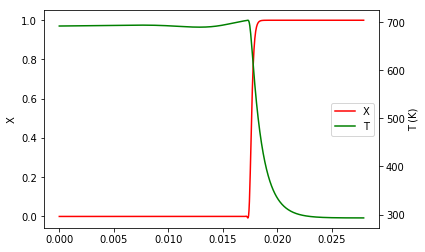

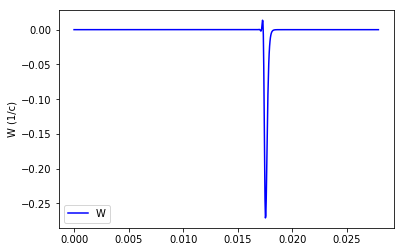

98


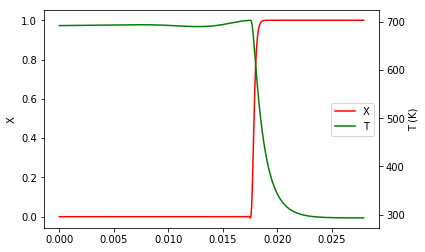

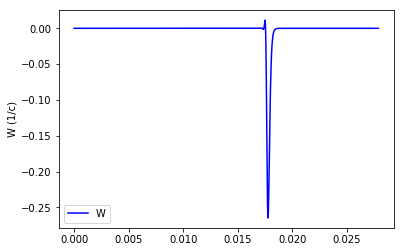

99


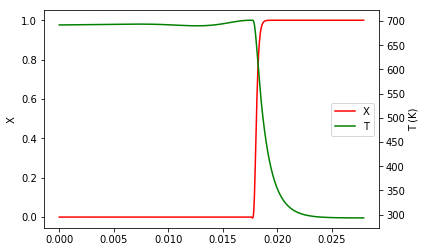

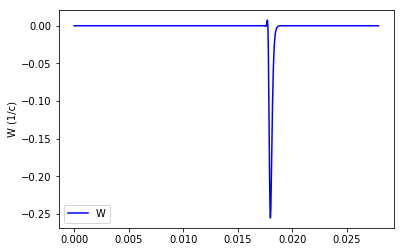

In [107]:
zs = np.arange(0, L, dz)
T = np.zeros([times, steps], dtype = float)
X = np.zeros([times, steps], dtype = float)
W = np.zeros([times, steps], dtype = float)
print(np.shape(zs), np.shape(T))

for (i,z) in enumerate(zs):
    X[0,i] = x0(z)
    T[0,i] = t0(z)
W[0,:] = W_(X[0,:], T[0,:])

for time in range(times):
    print(time)
    if time > 0:
        X[time, 0] = 0
        T[time, 0] = T_m
        (X[time, 1:-1], T[time, 1:-1]) = solve(X[time - 1, 1:-1], T[time - 1, 1:-1])
        X[time, -1] = X[time, -2]
        T[time, -1] = T[time, -2]
        W[time, : ] = W_(X[time, :], T[time, :])
            
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax2 = fig.add_axes(ax1.get_position(), frameon=False)
    l1, = ax1.plot(zs, X[time,:], label = 'X', color = 'red')
    l2, = ax2.plot(zs, T[time,:], label = 'T', color = 'green')
    
    ax1.set_ylabel('X')
    ax2.set_ylabel('T (K)')
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.set_xticks([])
    plt.legend([l1, l2], ['X', 'T'], loc=7)
    plt.show()
    
    l3, = plt.plot(zs, W[time,:], label = 'W', color = 'blue')
    plt.ylabel('W (1/c)')
    plt.legend()
    plt.show()
    #W всегда отрицательно